# CM50266 – Applied Data Science Semester 2 Coursework
## Tesco Grocery 1.0 Dataset vs. Income

### 1. Dataset Description

#### Basic description
The following datasets focus on the **in-store purchases** done in the ***411 Tesco shops*** within the boundaries of *Greater London* during the *entire year of 2015*.
There are series of csvs that hold sales records according to their regional sizes indicated on their names, from Lower Super Output Areas (approx. 2000 residents each) to Boroughs (approx. more than 250k residents).
So each set of data under its regional size was averaged over their population, which provides a fairly 


- Potential insight ideas


1. Gender dependency- Nutrients
    - For each gender population -> which nutrient consumption is higher (however, family...) 
2. Seasonal category taken changes
3. Seasonal Nutrients taken changes
    - Weight, Volume (beverage)
    - Certain substances
4. Regional Nutrients consumption difference
    - Nutrients based on size of the region
    - Sales 
5. Regional population density and consumption rate of any product
    - Average age
    - Their income
    - Explore the rate of increase throughout all products and compare this to average age and see the odd increase or decrease
    - Based on that, propose a theory.
    - Which geo-granularity? LSOA MSOA Ward Borough

> 1. Seasonal Nutrients taken changes (Borough, Ward) (all regions, average them, since you are considering the time-wise change)
>    - Changes in product consumptions over a year. (Maybe 4 seasons) (Histogram for each month) & heatmap for seasons
>    - Pick top n products the most changes happen (variance) (line graph)

>    - f_energy_nutrient: probablity distribution (Pie chart)
>    - f_category: probabiliy distribution (heatmap)

> 2. Regional population density and age corresponding (over a year Borough, 33 regions.)
>    - Population density - average age (correlation) (scatterplot, linegraph)
>    - Average age -> most change (oldest - mid - youngest) choropleth map

In [136]:
import numpy as np
import pandas as pd
import os

dataset_folder = csv_path = os.path.join('..', 'PurchaseDatasets')
area_level_csvs = os.listdir(dataset_folder)
dfs = []

for csv in area_level_csvs:
    df = pd.read_csv(dataset_folder+'/'+csv, index_col=None, header=0)
    dfs.append(df)

area_level_csvs_combined = pd.concat(dfs, axis=0, ignore_index=True)

area_level_csvs_combined.head()

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0  E09000001  324.440915            37.0          150.0          250.0   
1  E09000002  421.170169            32.5          165.0          300.0   
2  E09000003  413.666716            40.0          180.0          324.0   
3  E09000004  358.156972            29.0          140.0          255.0   
4  E09000005  435.715837            37.5          175.0          320.0   

   weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0          400.0           1000.0  314.036926     3.428958   96.984921  ...   
1          500.0           1500.0  579.539687     2.799225  119.051740  ...   
2          500.0           1300.0  448.107303     0.602654  111.907652  ...   
3          450.0           1000.0  438.067840     2.579771  104.120212  ...   
4          500.0           1500.0  605.822856     1.218297  125.448799  ...   

   man_day  population      male    female  age_0_17  age_18_64  age_65+  \
0     8523      6687.0    3697.0    2990.0    1018.0     4349.0   1320.0   
1    33116    203101.0   99442.0  103659.0   60281.0   123180.0  19640.0   
2   346737    378778.0  186357.0  192421.0   88754.0   237036.0  52988.0   
3    32785    242387.0  116814.0  125573.0   56028.0   146237.0  40122.0   
4   211828    323443.0  163939.0  159504.0   75033.0   211885.0  36525.0   

     avg_age  area_sq_km  people_per_sq_km  
0  43.910124        2.90       2305.862069  
1  33.017321       36.09       5627.625381  
2  37.195582       86.76       4365.813739  
3  38.880749       60.58       4001.105976  
4  35.766416       43.28       7473.267098  

[5 rows x 202 columns]

Display every column names

In [137]:
headings = area_level_csvs_combined.columns
for column in headings:
    print(column)

area_id
weight
weight_perc2.5
weight_perc25
weight_perc50
weight_perc75
weight_perc97.5
weight_std
weight_ci95
volume
volume_perc2.5
volume_perc25
volume_perc50
volume_perc75
volume_perc97.5
volume_std
volume_ci95
fat
fat_perc2.5
fat_perc25
fat_perc50
fat_perc75
fat_perc97.5
fat_std
fat_ci95
saturate
saturate_perc2.5
saturate_perc25
saturate_perc50
saturate_perc75
saturate_perc97.5
saturate_std
saturate_ci95
salt
salt_perc2.5
salt_perc25
salt_perc50
salt_perc75
salt_perc97.5
salt_std
salt_ci95
sugar
sugar_perc2.5
sugar_perc25
sugar_perc50
sugar_perc75
sugar_perc97.5
sugar_std
sugar_ci95
protein
protein_perc2.5
protein_perc25
protein_perc50
protein_perc75
protein_perc97.5
protein_std
protein_ci95
carb
carb_perc2.5
carb_perc25
carb_perc50
carb_perc75
carb_perc97.5
carb_std
carb_ci95
fibre
fibre_perc2.5
fibre_perc25
fibre_perc50
fibre_perc75
fibre_perc97.5
fibre_std
fibre_ci95
alcohol
alcohol_perc2.5
alcohol_perc25
alcohol_perc50
alcohol_perc75
alcohol_perc97.5
alcohol_std
alcohol_ci95
en

Display dataframe of columns specifically contain the keyword to explore

In [138]:
key_word = 'transaction'
weight_filtered_df = area_level_csvs_combined.filter(like=key_word, axis=1)
weight_filtered_df

transaction_days  num_transactions
0                    30           69260.0
1                    30          379108.0
2                    30         4892376.0
3                    30          245931.0
4                    30         2173639.0
...                 ...               ...
77572               364          508177.0
77573               364          419619.0
77574               364          136918.0
77575               364          285940.0
77576               364          978916.0

[77577 rows x 2 columns]

Display of example in Probability distributions of items

In [139]:
area_level_csvs_jan = [csv for csv in area_level_csvs if csv.startswith('Jan')]
dfs_jan = []
for csv in area_level_csvs_jan:
    df = pd.read_csv(dataset_folder+'/'+csv, index_col=None, header=0)
    dfs_jan.append(df)

jan_df = pd.concat(dfs_jan, ignore_index=True)

pd_of_items_jan_df = jan_df.filter(like='f_', axis=1)
pd_of_items_jan_df = pd_of_items_jan_df[[c for c in pd_of_items_jan_df if 'energy' not in c and 'weight' not in c]]

pd_of_items_jan_df

f_beer   f_dairy    f_eggs  f_fats_oils    f_fish  f_fruit_veg  \
0     0.013924  0.133086  0.011459     0.023539  0.021243     0.312780   
1     0.008440  0.106191  0.011557     0.029831  0.021228     0.246709   
2     0.007939  0.111454  0.012848     0.031014  0.024587     0.329417   
3     0.008796  0.101244  0.009227     0.023783  0.018948     0.255497   
4     0.007148  0.122492  0.012704     0.031046  0.020303     0.269776   
...        ...       ...       ...          ...       ...          ...   
5865  0.010988  0.113574  0.009062     0.024597  0.016892     0.232926   
5866  0.012819  0.104032  0.009519     0.024876  0.019503     0.242332   
5867  0.007769  0.088994  0.010124     0.024720  0.020600     0.266627   
5868  0.008109  0.092835  0.009138     0.025357  0.019608     0.217744   
5869  0.009682  0.118531  0.013458     0.024505  0.014773     0.239906   

      f_grains  f_meat_red  f_poultry  f_readymade  f_sauces  f_soft_drinks  \
0     0.129982    0.051086   0.018741     0.058537  0.013021       0.022184   
1     0.160835    0.052669   0.020188     0.067526  0.017000       0.034242   
2     0.138485    0.050742   0.021651     0.051508  0.017611       0.021306   
3     0.175505    0.046063   0.020753     0.084067  0.016792       0.027080   
4     0.163565    0.047180   0.022080     0.051629  0.016510       0.028311   
...        ...         ...        ...          ...       ...            ...   
5865  0.174039    0.047204   0.020239     0.072116  0.014493       0.038079   
5866  0.168211    0.050556   0.019249     0.064221  0.018488       0.039895   
5867  0.156680    0.039906   0.018481     0.081813  0.015656       0.041789   
5868  0.168301    0.039821   0.019366     0.065299  0.015493       0.055435   
5869  0.165111    0.053118   0.023490     0.073198  0.013309       0.036033   

      f_spirits  f_sweets  f_tea_coffee   f_water    f_wine  
0      0.002672  0.128853      0.008279  0.025007  0.025609  
1      0.002579  0.170685      0.008167  0.035353  0.006799  
2      0.002258  0.132036      0.007732  0.027112  0.012301  
3      0.002083  0.162516      0.008853  0.029390  0.009403  
4      0.002700  0.152561      0.008068  0.034122  0.009804  
...         ...       ...           ...       ...       ...  
5865   0.003347  0.162136      0.007799  0.036595  0.015914  
5866   0.002919  0.158607      0.008123  0.040572  0.016076  
5867   0.002354  0.171160      0.008711  0.036021  0.008593  
5868   0.003328  0.202796      0.009199  0.040850  0.007323  
5869   0.002712  0.158041      0.007869  0.032540  0.013725  

[5870 rows x 17 columns]

In order to see how each area code store the record

In [140]:
jan_df_same_area = jan_df[jan_df['area_id'] == 'E09000001']

jan_df_same_area

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0  E09000001  330.866887            32.5          150.0          260.0   

   weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0          440.0           1000.0  342.577936     3.607936  104.009275  ...   

   man_day  population    male  female  age_0_17  age_18_64  age_65+  \
0     8928      6687.0  3697.0  2990.0    1018.0     4349.0   1320.0   

     avg_age  area_sq_km  people_per_sq_km  
0  43.910124         2.9       2305.862069  

[1 rows x 202 columns]

Geographical data fields

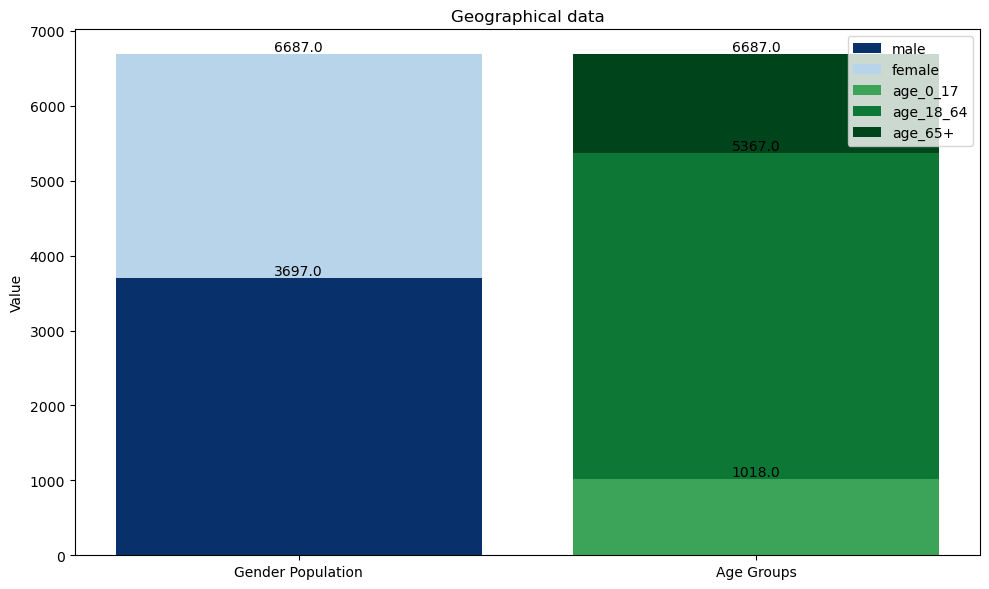

In [141]:
import matplotlib.pyplot as plt
geo_fields = ['area_id','population','male','female','age_0_17','age_18_64','age_65+','avg_age','area_sq_km','people_per_sq_km']
geo_df = area_level_csvs_combined[geo_fields]
geo_df.head()
geo_df = geo_df.iloc[0]

plt.figure(figsize = (10, 6))

bottom1 = np.zeros(1)
bar1 = plt.bar("Gender Population", geo_df['male'], bottom = bottom1, label='male', color='#08306b')
bottom1 += np.array([geo_df['male']])
plt.text(bar1[0].get_x() + bar1[0].get_width()/2, geo_df['male'], round(float(bottom1), 3), va='bottom', ha='center')
bar2 = plt.bar("Gender Population", geo_df['female'], bottom = bottom1, label='female', color='#b7d4ea')
bottom1 += np.array([geo_df['female']])
plt.text(bar2[0].get_x() + bar2[0].get_width()/2, geo_df['male']+geo_df['female'], round(float(bottom1), 3), va='bottom', ha='center')

bottom = np.zeros(1)
bar3 = plt.bar("Age Groups", geo_df['age_0_17'], bottom = bottom, label='age_0_17', color='#3ba458')
bottom += np.array([geo_df['age_0_17']])
plt.text(bar3[0].get_x() + bar3[0].get_width()/2, geo_df['age_0_17'], round(float(bottom), 3), va='bottom', ha='center')
bar4 = plt.bar("Age Groups", geo_df['age_18_64'], bottom = bottom, label='age_18_64', color='#0d7836')
bottom += np.array([geo_df['age_18_64']])
plt.text(bar4[0].get_x() + bar4[0].get_width()/2, geo_df['age_0_17']+geo_df['age_18_64'], round(float(bottom), 3), va='bottom', ha='center')
bar5 = plt.bar("Age Groups", geo_df['age_65+'], bottom = bottom, label='age_65+', color='#00441b')
bottom += np.array([geo_df['age_65+']])
plt.text(bar5[0].get_x() + bar5[0].get_width()/2, geo_df['age_0_17']+geo_df['age_18_64']+geo_df['age_65+'], round(float(bottom), 3), va='bottom', ha='center')

bars = [bar1, bar2, bar3, bar4, bar5]

plt.xticks()
plt.ylabel('Value')
plt.title('Geographical data')
plt.legend()
plt.tight_layout()
plt.show()

In [142]:
geo_df = area_level_csvs_combined[geo_fields]
geo_df.head()

area_id  population      male    female  age_0_17  age_18_64  age_65+  \
0  E09000001      6687.0    3697.0    2990.0    1018.0     4349.0   1320.0   
1  E09000002    203101.0   99442.0  103659.0   60281.0   123180.0  19640.0   
2  E09000003    378778.0  186357.0  192421.0   88754.0   237036.0  52988.0   
3  E09000004    242387.0  116814.0  125573.0   56028.0   146237.0  40122.0   
4  E09000005    323443.0  163939.0  159504.0   75033.0   211885.0  36525.0   

     avg_age  area_sq_km  people_per_sq_km  
0  43.910124        2.90       2305.862069  
1  33.017321       36.09       5627.625381  
2  37.195582       86.76       4365.813739  
3  38.880749       60.58       4001.105976  
4  35.766416       43.28       7473.267098

In [143]:
ent_df = area_level_csvs_combined[['area_id','h_items', 'h_items_norm', 'h_items_weight', 'h_items_weight_norm']]
ent_df.head()

area_id   h_items  h_items_norm  h_items_weight  h_items_weight_norm
0  E09000001  3.181010      0.778236        2.699191             0.780241
1  E09000002  3.257637      0.796983        2.728043             0.788581
2  E09000003  3.168729      0.775231        2.666551             0.770806
3  E09000004  3.245876      0.794105        2.753877             0.796049
4  E09000005  3.248138      0.794659        2.711172             0.783704

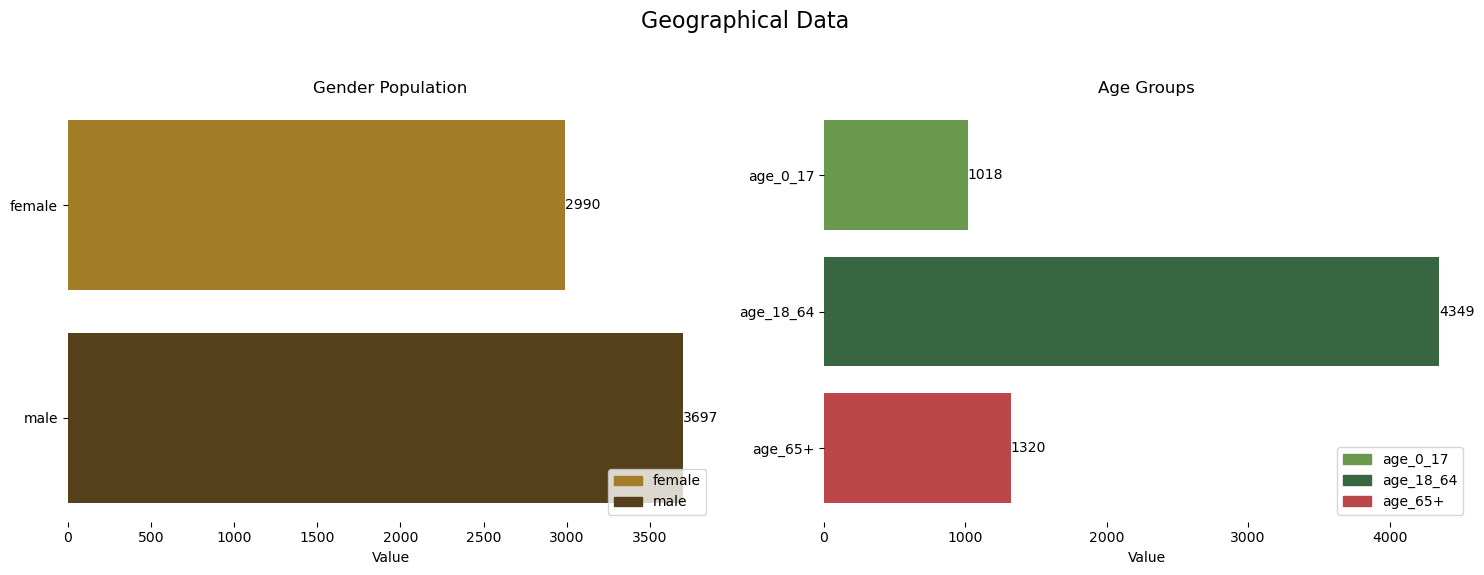

In [144]:
import matplotlib.patches as mpatches

gender_categories = ['female', 'male']
gender_values = [2990, 3697]

age_categories = ['age_0_17', 'age_18_64', 'age_65+']
age_values = [1018, 4349, 1320]

# Defining a color palette inspired by the second image, with earthy tones
earth_tones = ['#a37c27', '#563f1b']
green_tones = ['#6a994e', '#386641', '#bc4749']

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Gender Population
axs[0].barh(gender_categories, gender_values, color=earth_tones)
axs[0].set_xlabel('Value')
axs[0].set_title('Gender Population')
axs[0].invert_yaxis()  # labels read top-to-bottom

# Add value labels to the gender plot
for index, value in enumerate(gender_values):
    axs[0].text(value, index, str(value), va='center', ha='left')

# Plot for Age Groups
axs[1].barh(age_categories, age_values, color=green_tones)
axs[1].set_xlabel('Value')
axs[1].set_title('Age Groups')
axs[1].invert_yaxis()  # labels read top-to-bottom

# Add value labels to the age plot
for index, value in enumerate(age_values):
    axs[1].text(value, index, str(value), va='center', ha='left')

# Remove spines for a cleaner look
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Add patches for legend
patches = [mpatches.Patch(color=earth_tones[i], label=gender_categories[i]) for i in range(len(gender_categories))]
axs[0].legend(handles=patches, loc='lower right')

patches = [mpatches.Patch(color=green_tones[i], label=age_categories[i]) for i in range(len(age_categories))]
axs[1].legend(handles=patches, loc='lower right')

# Set a common title
plt.suptitle('Geographical Data', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig('GeoBar.png', transparent=True)

# Show the plot
plt.show()


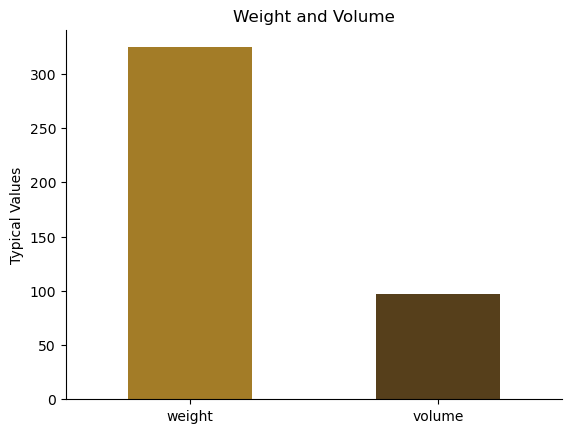

In [145]:
wei_vol = area_level_csvs_combined[['weight', 'volume']].iloc[0]
earthy_colors = ['#a37c27', '#563f1b']
wei_vol.plot(kind='bar', color = earthy_colors)
plt.ylabel('Typical Values')
plt.xticks(rotation=0)
plt.title('Weight and Volume')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.savefig('weight_vol.png', transparent=True)
plt.show()


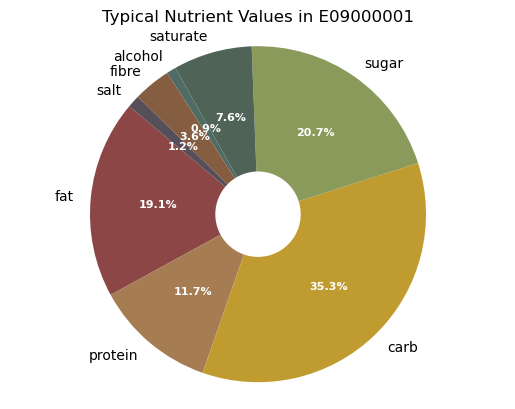

In [146]:
nutrient_columns = ['alcohol', 'saturate', 'protein', 'fat', 'fibre', 'salt', 'sugar', 'carb']
nut_df = area_level_csvs_combined[nutrient_columns].iloc[0]

nutrient_names = ['fat', 'protein', 'carb', 'sugar', 'saturate', 'alcohol', 'fibre', 'salt']
nutrient_values = [19.1, 11.7, 35.3, 20.7, 7.6, 0.9, 3.6, 1.2]
colors = ['#8C4646', '#A67C52', '#BF9B30', '#8A9A5B', '#4F6457', '#4E6B66', '#855E42', '#564E58']

# Create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(nutrient_values, labels=nutrient_names, autopct='%1.1f%%', startangle=140, colors=colors)

# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0, 0), 0.25, color='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Increase font size for the autopct
plt.setp(autotexts, size=8, weight="bold", color="white")

# Add a title and set its color
plt.title('Typical Nutrient Values in E09000001', color='black')
plt.tight_layout
# Show the plot
plt.savefig('piechart.png', transparent=True)
plt.show()


In [147]:
from matplotlib import cm
from matplotlib import colors as clrs
# Generate a palette of 4 shades of green, from lighter to darker

colors = cm.Greens(np.linspace(0.3, 1, 5))

# Convert the RGBA colors to hex format

hex_colors = [clrs.rgb2hex(color) for color in colors]

print(hex_colors)

['#b8e3b2', '#7dc87e', '#3ba458', '#0d7836', '#00441b']


In [148]:
f_ener_df = area_level_csvs_combined[['area_id']+[col for col in area_level_csvs_combined.columns if 'f_energy' in col]]
f_ener_df.head()

area_id  f_energy_fat  f_energy_saturate  f_energy_sugar  \
0  E09000001      0.460770           0.182909        0.222449   
1  E09000002      0.438515           0.170703        0.224653   
2  E09000003      0.453776           0.179818        0.220819   
3  E09000004      0.438699           0.167533        0.235586   
4  E09000005      0.457489           0.182757        0.222473   

   f_energy_protein  f_energy_carb  f_energy_fibre  f_energy_alcohol  
0          0.125670       0.379068        0.018426          0.016065  
1          0.108306       0.431064        0.015429          0.006686  
2          0.120449       0.397666        0.018149          0.009959  
3          0.111708       0.425588        0.016275          0.007730  
4          0.111596       0.407228        0.016028          0.007659

In [149]:
ener_df = area_level_csvs_combined[[col for col in area_level_csvs_combined.columns if 'energy' in col and not 'f_' in col and not '_ci' in col and not 'std' in col]]
ener_df.head()

energy_fat  energy_fat_perc2.5  energy_fat_perc25  energy_fat_perc50  \
0   76.122369                 0.0                1.8               16.2   
1   83.415655                 0.0                1.8               19.8   
2   76.341784                 0.0                1.8               15.3   
3   81.926032                 0.0                1.8               20.7   
4   83.250116                 0.0                1.8               18.0   

   energy_fat_perc75  energy_fat_perc97.5  energy_saturate  \
0              113.4               414.00        30.217761   
1              122.4               449.10        32.471590   
2              104.4               454.50        30.251946   
3              123.3               414.00        31.286368   
4              117.9               483.57        33.256637   

   energy_saturate_perc2.5  energy_saturate_perc25  energy_saturate_perc50  \
0                      0.0                     0.9                     3.6   
1                      0.0                     0.9                     6.3   
2                      0.0                     0.9                     3.6   
3                      0.0                     0.9                     6.3   
4                      0.0                     0.9                     5.4   

   ...  energy_alcohol_perc50  energy_alcohol_perc75  energy_alcohol_perc97.5  \
0  ...                    0.0                    0.0                    49.77   
1  ...                    0.0                    0.0                     0.00   
2  ...                    0.0                    0.0                    18.48   
3  ...                    0.0                    0.0                    14.00   
4  ...                    0.0                    0.0                    12.32   

   energy_tot  energy_tot_perc2.5  energy_tot_perc25  energy_tot_perc50  \
0  165.206732                 0.0               39.9               88.9   
1  190.223194                 0.0               41.7              127.5   
2  168.236571                 0.0               38.9               94.2   
3  186.747871                 0.0               41.7              120.6   
4  181.971932                 0.0               41.2              110.2   

   energy_tot_perc75  energy_tot_perc97.5  energy_density  
0              255.2                551.0        0.509204  
1              302.0                583.4        0.451654  
2              262.9                581.2        0.406696  
3              291.4                550.9        0.521413  
4              284.3                604.1        0.417639  

[5 rows x 49 columns]

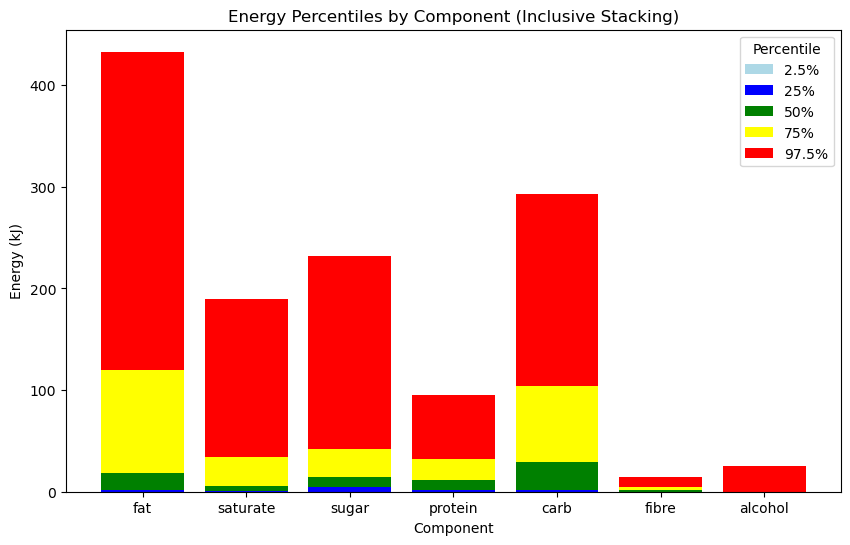

In [150]:
import re

borough_year_csv = [csv for csv in area_level_csvs if  "year_borough" in csv]
borough_year_df = pd.read_csv(dataset_folder+'/'+ borough_year_csv[0])

energy_content_pattern = r'energy_([a-z]+)$'
energy_percentiles_pattern = r'energy_([a-z]+)_perc\d+\.?\d*$'

# Filter and categorize columns
energy_content_columns = [col for col in borough_year_df.columns if re.search(energy_content_pattern, col)]
energy_percentiles_columns = [col for col in borough_year_df.columns if re.search(energy_percentiles_pattern, col)]

components = ["fat", "saturate", "sugar", "protein", "carb", "fibre", "alcohol"]

# Prepare dataframes for percentiles and energy contents
percentiles_data = {component: [] for component in components}
energy_data = {component: borough_year_df[f"energy_{component}"].mean() for component in components}

for component in components:
    for percentile in [2.5, 25, 50, 75, 97.5]:
        column_name = f"energy_{component}_perc{percentile}"
        percentiles_data[component].append(borough_year_df[column_name].mean())

# Convert dictionaries to DataFrames for easier plotting
df_percentiles = pd.DataFrame(percentiles_data, index=[2.5, 25, 50, 75, 97.5])
df_energy = pd.DataFrame(energy_data, index=["Energy"])

fig, ax = plt.subplots(figsize=(10, 6))

percentile_colors = {
    2.5: 'lightblue',
    25: 'blue',
    50: 'green',
    75: 'yellow',
    97.5: 'red'
}

# Plotting the corrected stacked bar graph for each component's percentiles
for component in components:
    # Start from the highest percentile and stack backwards
    for percentile in reversed([2.5, 25, 50, 75, 97.5]):
        ax.bar(component, df_percentiles.loc[percentile, component], color=percentile_colors[percentile], label=f'{percentile}%' if component == 'fat' else "")

ax.set_title("Energy Percentiles by Component (Inclusive Stacking)")
ax.set_xlabel("Component")
ax.set_ylabel("Energy (kJ)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Percentile")  # Reverse the legend to match the order

# plt.savefig('energy_perc_stack.png', transparent=True)
# Show plot
plt.show()


In [151]:
f_ener_df_pie.index

Index(['f_energy_fat', 'f_energy_fibre', 'f_energy_sugar', 'f_energy_protein',
       'f_energy_carb', 'f_energy_saturate', 'f_energy_alcohol'],
      dtype='object')

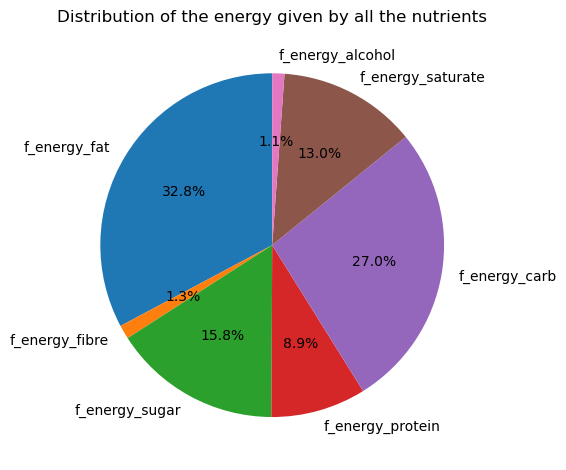

In [152]:
# fig, ax = plt.subplots()
f_ener_df_pie = f_ener_df.iloc[0,1:]
order = ['f_energy_fat', 'f_energy_fibre', 'f_energy_sugar',
       'f_energy_protein', 'f_energy_carb', 'f_energy_saturate',
       'f_energy_alcohol']
f_ener_df_pie = f_ener_df_pie.reindex(order)
# explode_threshold = 10  # percentage threshold
# explode = [0.1 if value < explode_threshold else 0 for value in f_ener_df_pie.values]
plt.pie(f_ener_df_pie.values, labels=f_ener_df_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the energy given by all the nutrients')
plt.tight_layout()
# plt.savefig('distribution_energy_pie.png', transparent=True)
plt.show()


### 2. Dataset Insights

> 1. Seasonal Nutrients taken changes (Borough, Ward) (all regions, average them, since you are considering the time-wise change)
>    - Changes in product consumptions over a year. (Maybe 4 seasons) (Histogram for each month) & heatmap for seasons
>    - Pick top n products the most changes happen (variance) (line graph)

>    - f_energy_nutrient: probablity distribution (Pie chart)
>    - f_category: probabiliy distribution (heatmap)

In [153]:

borough_csvs = [csv for csv in area_level_csvs if "borough" in csv and "year" not in csv]
ward_csvs = [csv for csv in area_level_csvs if "osward" in csv and "year" not in csv]

borough_dfs = []
ward_dfs = []

for csv in borough_csvs:
    df = pd.read_csv(dataset_folder+'/'+csv)
    borough_dfs.append(df)

for csv in ward_csvs:
    df = pd.read_csv(dataset_folder+'/'+csv)
    ward_dfs.append(df)

apr_borough_df = borough_dfs[0]
aug_borough_df = borough_dfs[1]
dec_borough_df = borough_dfs[2]
feb_borough_df = borough_dfs[3]
jan_borough_df = borough_dfs[4]
jul_borough_df = borough_dfs[5]
jun_borough_df = borough_dfs[6]
mar_borough_df = borough_dfs[7]
may_borough_df = borough_dfs[8]
nov_borough_df = borough_dfs[9]
oct_borough_df = borough_dfs[10]
sep_borough_df = borough_dfs[11]

apr_osward_df = ward_dfs[0]
aug_osward_df = ward_dfs[1]
dec_osward_df = ward_dfs[2]
feb_osward_df = ward_dfs[3]
jan_osward_df = ward_dfs[4]
jul_osward_df = ward_dfs[5]
jun_osward_df = ward_dfs[6]
mar_osward_df = ward_dfs[7]
may_osward_df = ward_dfs[8]
nov_osward_df = ward_dfs[9]
oct_osward_df = ward_dfs[10]
sep_osward_df = ward_dfs[11]


Weights and Volumes

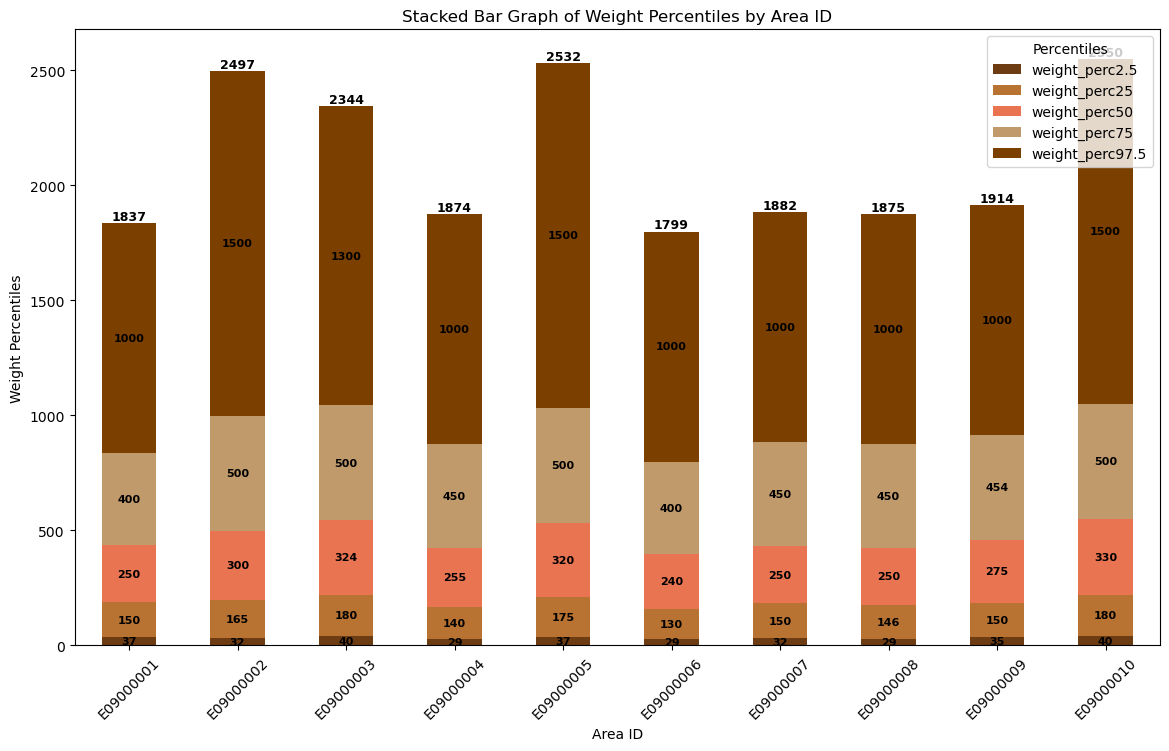

In [154]:
# Define the weight percentile columns for the plot
weight_percentiles = ['weight_perc2.5', 'weight_perc25', 'weight_perc50', 'weight_perc75', 'weight_perc97.5']
apr_borough_df15 = apr_borough_df.head(10)
# Create the stacked bar plot
colors = ["#6e3c12", "#b87333", "#e97451", "#c19a6b", "#7b3f00"]
ax = apr_borough_df15.set_index('area_id')[weight_percentiles].plot(kind='bar', stacked=True, color = colors, figsize=(14, 8))
ax.set_title('Stacked Bar Graph of Weight Percentiles by Area ID')
ax.set_xlabel('Area ID')
ax.set_ylabel('Weight Percentiles')
plt.legend(title='Percentiles')
plt.xticks(rotation=45)
for i, area in enumerate(apr_borough_df15['area_id']):
    cumulative_height = 0
    for percentile in weight_percentiles:
        value = apr_borough_df15.loc[apr_borough_df15['area_id'] == area, percentile].values[0]
        if value != 0:  # Avoid annotating zero values
            ax.text(i, cumulative_height + value/2, str(int(value)), ha='center', va='center', fontweight='bold', fontsize=8)
        cumulative_height += value
    # Annotate the total at the top of each bar
    ax.text(i, cumulative_height, f'{int(cumulative_height)}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='black')
# plt.savefig('stack_weight_perc.png', transparent=True)
plt.show()

In [155]:
food_categories = ['f_beer','f_dairy','f_eggs','f_fats_oils','f_fish','f_fruit_veg','f_grains','f_meat_red','f_poultry','f_readymade','f_sauces','f_soft_drinks','f_spirits','f_sweets','f_tea_coffee','f_water','f_wine']

borough_product_pb_mean_list = [df[food_categories].mean() for df in borough_dfs]
ward_product_pb_mean_list = [df[food_categories].mean() for df in ward_dfs]

apr_pb_data = borough_product_pb_mean_list[0]
aug_pb_data = borough_product_pb_mean_list[1]
dec_pb_data = borough_product_pb_mean_list[2]
feb_pb_data = borough_product_pb_mean_list[3]
jan_pb_data = borough_product_pb_mean_list[4]
jul_pb_data = borough_product_pb_mean_list[5]
jun_pb_data = borough_product_pb_mean_list[6]
mar_pb_data = borough_product_pb_mean_list[7]
may_pb_data = borough_product_pb_mean_list[8]
nov_pb_data = borough_product_pb_mean_list[9]
oct_pb_data = borough_product_pb_mean_list[10]
sep_pb_data = borough_product_pb_mean_list[11]

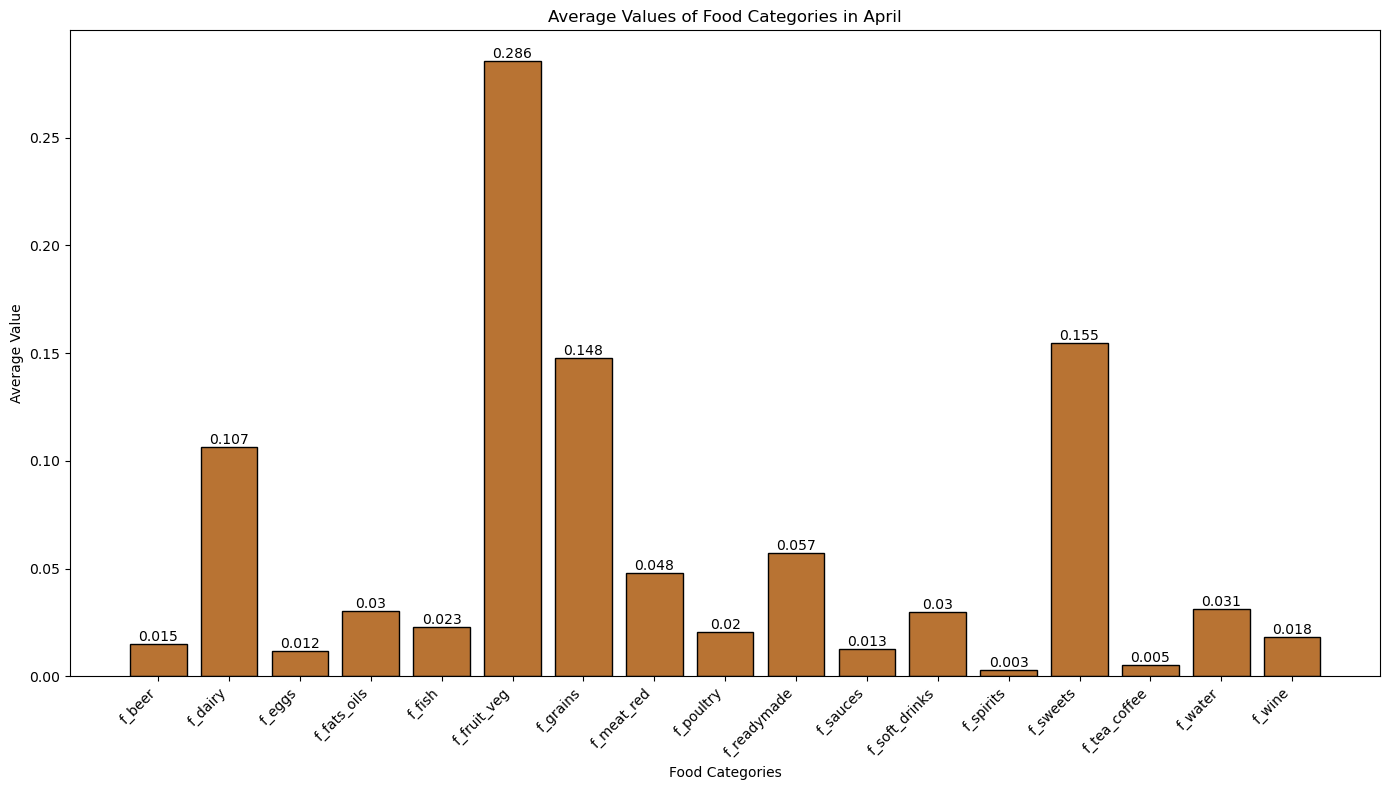

In [156]:

plt.figure(figsize=(14, 8))
bars = plt.bar(apr_pb_data.index, apr_pb_data.values, color='#b87333', edgecolor='black')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center')

plt.title('Average Values of Food Categories in April')
plt.xlabel('Food Categories')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# plt.savefig('distribution_bar.png', transparent=True)
plt.show()

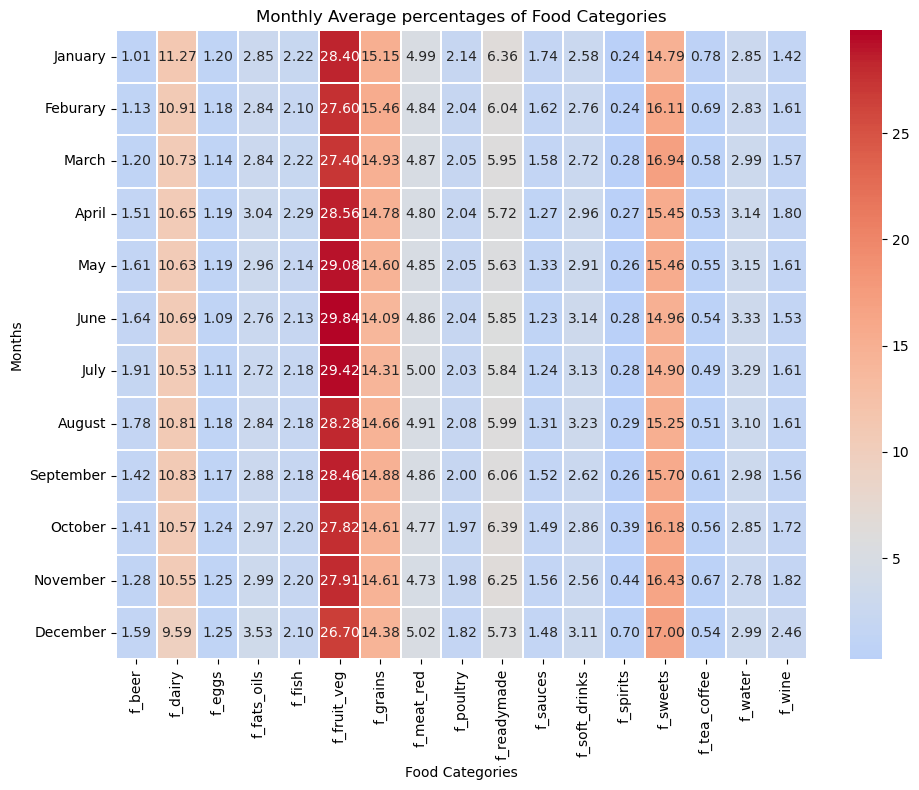

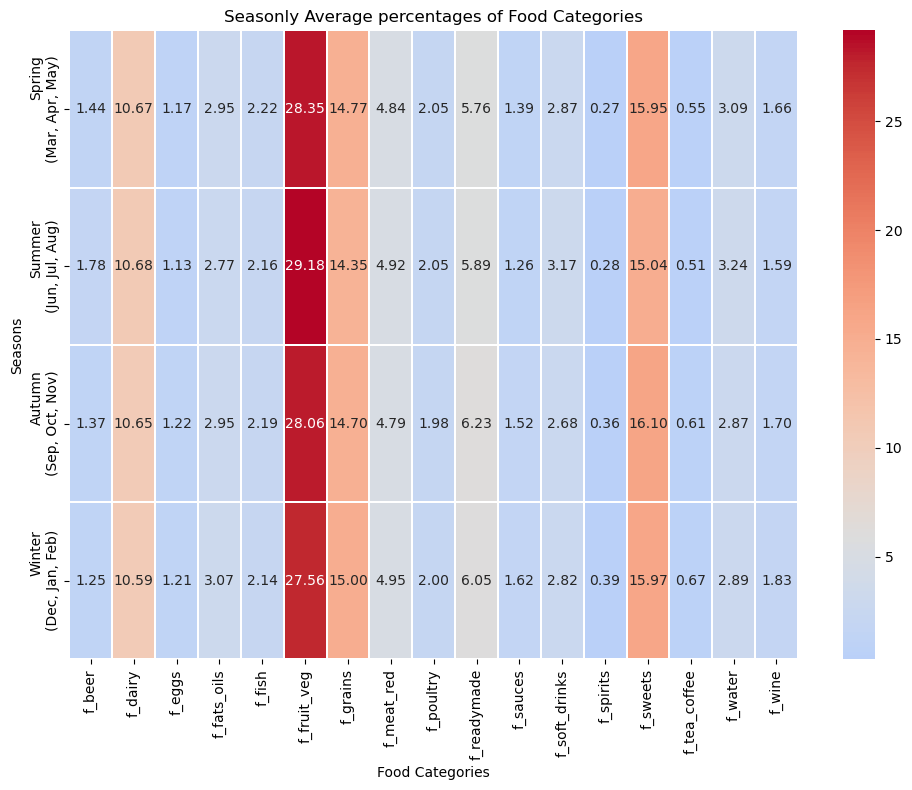

In [157]:
import seaborn as sns
months = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_pbs = [jan_pb_data, feb_pb_data, mar_pb_data, apr_pb_data, may_pb_data, jun_pb_data, jul_pb_data, aug_pb_data, sep_pb_data, oct_pb_data, nov_pb_data, dec_pb_data]

food_cat_heatmap_df = pd.DataFrame(average_pbs, index=months, columns=food_categories)
food_cat_heatmap_df_perc = food_cat_heatmap_df * 100
plt.figure(figsize=(10, 8))
sns.heatmap(food_cat_heatmap_df_perc, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.3, center=food_cat_heatmap_df_perc.values.mean(), vmin=food_cat_heatmap_df_perc.values.min(), vmax=food_cat_heatmap_df_perc.values.max())
plt.title('Monthly Average percentages of Food Categories')
plt.xlabel('Food Categories')
plt.ylabel('Months')
plt.tight_layout()
# plt.savefig('monthly_heatmap.png', transparent=True)
plt.show()

seasons = ['Spring\n(Mar, Apr, May)', 'Summer\n(Jun, Jul, Aug)', 'Autumn\n(Sep, Oct, Nov)', 'Winter\n(Dec, Jan, Feb)']

spring_pb_data = (mar_pb_data + apr_pb_data + may_pb_data) / 3
summer_pb_data = (jun_pb_data + jul_pb_data + aug_pb_data) / 3
autumn_pb_data = (sep_pb_data + oct_pb_data + nov_pb_data) / 3
winter_pb_data = (dec_pb_data + jan_pb_data + feb_pb_data) / 3 

seasons_pb_data = [spring_pb_data, summer_pb_data, autumn_pb_data, winter_pb_data]

season_heatmap_df = pd.DataFrame(seasons_pb_data, index=seasons, columns=food_categories)
season_heatmap_df_perc = season_heatmap_df * 100
plt.figure(figsize=(10, 8))
sns.heatmap(season_heatmap_df_perc, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.3, center=season_heatmap_df_perc.values.mean(), vmin=season_heatmap_df_perc.values.min(), vmax=season_heatmap_df_perc.values.max())
plt.title('Seasonly Average percentages of Food Categories')
plt.xlabel('Food Categories')
plt.ylabel('Seasons')
plt.tight_layout()
# plt.savefig('seaonal_heatmap.png', transparent=True)
plt.show()

In [158]:
food_pb_array = np.array(average_pbs)
variances = np.var(food_pb_array, axis=0)

top_five_indices = np.argsort(variances)[-5:][::-1]
top_five_variance = variances[top_five_indices]
top_five_categories = []

bottom_five_indices = np.argsort(variances)[:5]
bottom_five_categories = []

for i in top_five_indices:
    top_five_categories.append(food_categories[i])
for i in bottom_five_indices:
    bottom_five_categories.append(food_categories[i])

print('Top 5 Categories indices:', top_five_indices)
print('Top 5 Categories categories:', top_five_categories)

print('Bottom 5 Categories indices:', bottom_five_indices)
print('Bottom 5 Categories categories:', bottom_five_categories, '\n')

food_pb_array_season = np.array(seasons_pb_data)
variances_season = np.var(food_pb_array_season, axis=0)

top_five_indices_season = np.argsort(variances_season)[-5:][::-1]
top_five_variance_season = variances_season[top_five_indices]
top_five_categories_season = []

bottom_five_indices_season = np.argsort(variances_season)[:5]
bottom_five_categories_season = []

for i in top_five_indices_season:
    top_five_categories_season.append(food_categories[i])
for i in bottom_five_indices_season:
    bottom_five_categories_season.append(food_categories[i])

print('Seasonal Top 5 Categories indices:', top_five_indices_season)
print('Seasonal Top 5 Categories categories:', top_five_categories_season)

print('Seasonal Bottom 5 Categories indices:', bottom_five_indices_season)
print('Seasonal Bottom 5 Categories categories:', bottom_five_categories_season)

Top 5 Categories indices: [ 5 13  1  6  0]
Top 5 Categories categories: ['f_fruit_veg', 'f_sweets', 'f_dairy', 'f_grains', 'f_beer']
Bottom 5 Categories indices: [ 2  4  8 14  7]
Bottom 5 Categories categories: ['f_eggs', 'f_fish', 'f_poultry', 'f_tea_coffee', 'f_meat_red'] 

Seasonal Top 5 Categories indices: [ 5 13  6  0 11]
Seasonal Top 5 Categories categories: ['f_fruit_veg', 'f_sweets', 'f_grains', 'f_beer', 'f_soft_drinks']
Seasonal Bottom 5 Categories indices: [ 8  4  1  2 12]
Seasonal Bottom 5 Categories categories: ['f_poultry', 'f_fish', 'f_dairy', 'f_eggs', 'f_spirits']


#### Monthly variances scattered-line grpah

Top 5 Categories indices: [ 5 13  1  6  0]

Top 5 Categories categories: ['f_fruit_veg', 'f_sweets', 'f_dairy', 'f_grains', 'f_beer']

Bottom 5 Categories indices: [ 2  4  8 14  7]

Bottom 5 Categories categories: ['f_eggs', 'f_fish', 'f_poultry', 'f_tea_coffee', 'f_meat_red']

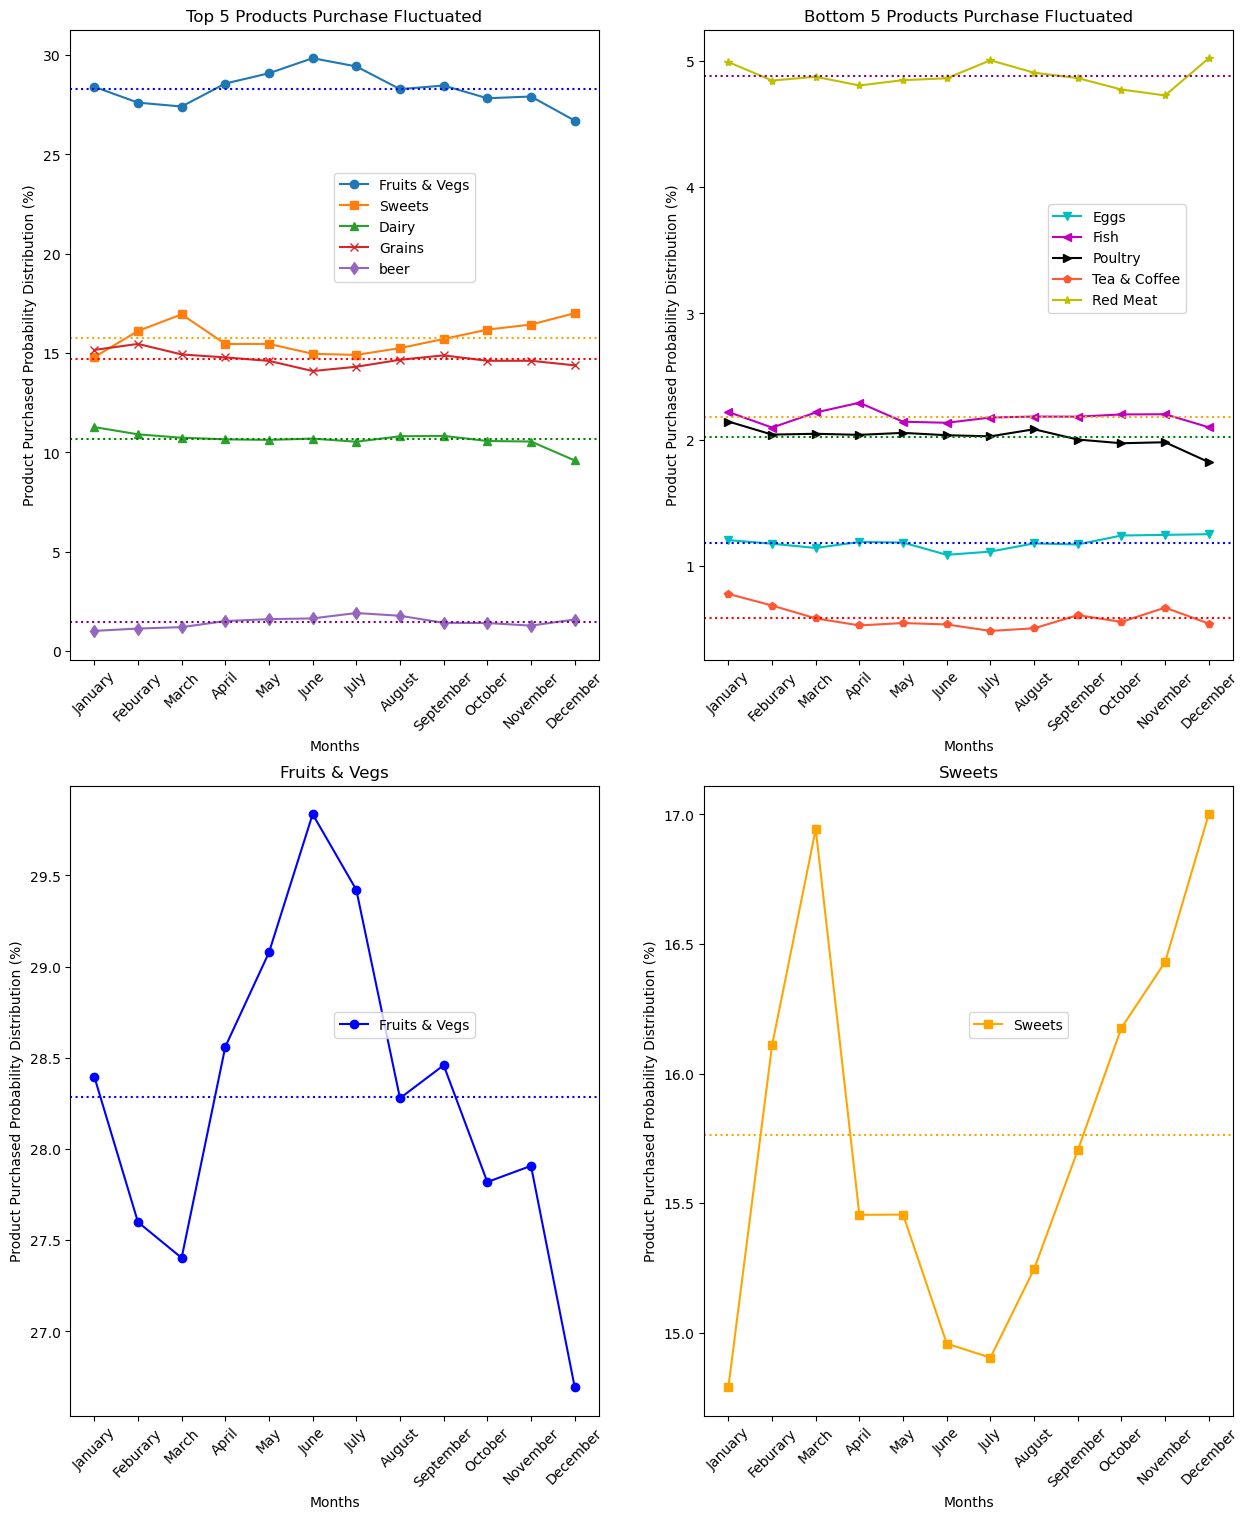

In [159]:
import statistics
import matplotlib.gridspec as gridspec

fruit_veg_every_month = []
sweets_every_month = []
dairy_every_month = []
grains_every_month = []
beer_every_month = []

for pb_list in average_pbs:
    fruit_veg_every_month.append(pb_list[5])
    sweets_every_month.append(pb_list[13])
    dairy_every_month.append(pb_list[1])
    grains_every_month.append(pb_list[6])
    beer_every_month.append(pb_list[0])

fruit_veg_every_month = [i*100 for i in  fruit_veg_every_month]
sweets_every_month = [i*100 for i in sweets_every_month]
dairy_every_month = [i*100 for i in dairy_every_month]
grains_every_month = [i*100 for i in grains_every_month]
beer_every_month = [i*100 for i in beer_every_month]

fv_mean = statistics.mean(fruit_veg_every_month)
sw_mean = statistics.mean(sweets_every_month)
da_mean = statistics.mean(dairy_every_month)
gr_mean = statistics.mean(grains_every_month)
be_mean = statistics.mean(beer_every_month)

#---------------------------------------------------------------------------------------

eggs_every_month = []
fish_every_month = []
poultry_every_month = []
tea_coffee_every_month = []
meat_red_every_month = []

for pb_list in average_pbs:
    eggs_every_month.append(pb_list[2])
    fish_every_month.append(pb_list[4])
    poultry_every_month.append(pb_list[8])
    tea_coffee_every_month.append(pb_list[14])
    meat_red_every_month.append(pb_list[7])

eggs_every_month = [i*100 for i in  eggs_every_month]
fish_every_month = [i*100 for i in fish_every_month]
poultry_every_month = [i*100 for i in poultry_every_month]
tea_coffee_every_month = [i*100 for i in tea_coffee_every_month]
meat_red_every_month = [i*100 for i in meat_red_every_month]

eg_mean = statistics.mean(eggs_every_month)
fi_mean = statistics.mean(fish_every_month)
po_mean = statistics.mean(poultry_every_month)
te_mean = statistics.mean(tea_coffee_every_month)
me_mean = statistics.mean(meat_red_every_month)

fig = plt.figure(figsize=(15, 18))

gs = gridspec.GridSpec(2,2, width_ratios=[1,1])
ax = fig.add_subplot(gs[0,0])

ax.plot(months, fruit_veg_every_month, '-o', label = "Fruits & Vegs")
ax.plot(months, sweets_every_month, '-s', label = 'Sweets')
ax.plot(months, dairy_every_month, '-^', label = 'Dairy')
ax.plot(months, grains_every_month, '-x', label = 'Grains')
ax.plot(months, beer_every_month, '-d', label = 'beer')


ax.axhline(y=fv_mean, color='b', linestyle=':')
ax.axhline(y=sw_mean, color='orange', linestyle=':')
ax.axhline(y=da_mean, color='g', linestyle=':')
ax.axhline(y=gr_mean, color='r', linestyle=':')
ax.axhline(y=be_mean, color='purple', linestyle=':')

ax.set_title('Top 5 Products Purchase Fluctuated')
ax.set_xlabel('Months')
ax.set_ylabel('Product Purchased Probability Distribution (%)')
ax.legend(loc = (0.5, 0.6))

plt.xticks(rotation = 45)

ax1 = fig.add_subplot(gs[0,1])

ax1.plot(months, eggs_every_month, '-v', color='c', label = "Eggs")
ax1.plot(months, fish_every_month, '-<', color='m', label = 'Fish')
ax1.plot(months, poultry_every_month, '->', color='k', label = 'Poultry')
ax1.plot(months, tea_coffee_every_month, '-p', color='#FF5733', label = 'Tea & Coffee')
ax1.plot(months, meat_red_every_month, '-*', color='y', label = 'Red Meat')


ax1.axhline(y=eg_mean, color='b', linestyle=':')
ax1.axhline(y=fi_mean, color='orange', linestyle=':')
ax1.axhline(y=po_mean, color='g', linestyle=':')
ax1.axhline(y=te_mean, color='r', linestyle=':')
ax1.axhline(y=me_mean, color='purple', linestyle=':')

ax1.set_title('Bottom 5 Products Purchase Fluctuated')
ax1.set_xlabel('Months')
ax1.set_ylabel('Product Purchased Probability Distribution (%)')
ax1.legend(loc = (0.65, 0.55))

plt.xticks(rotation = 45)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(months, fruit_veg_every_month, '-o', label = "Fruits & Vegs", color='b')
ax2.axhline(y=fv_mean, color='b', linestyle=':')

ax2.set_title('Fruits & Vegs')
ax2.set_xlabel('Months')
ax2.set_ylabel('Product Purchased Probability Distribution (%)')
ax2.legend(loc = (0.5, 0.6))
plt.xticks(rotation = 45)

ax3 = fig.add_subplot(gs[1,1])
ax3.plot(months, sweets_every_month, '-s', label = 'Sweets', color='orange')
ax3.axhline(y=sw_mean, color='orange', linestyle=':')
ax3.set_title('Sweets')
ax3.set_xlabel('Months')
ax3.set_ylabel('Product Purchased Probability Distribution (%)')
ax3.legend(loc = (0.5, 0.6))
plt.xticks(rotation = 45)
# plt.savefig('monthly_distribution_line.png', transparent=True)
plt.show()

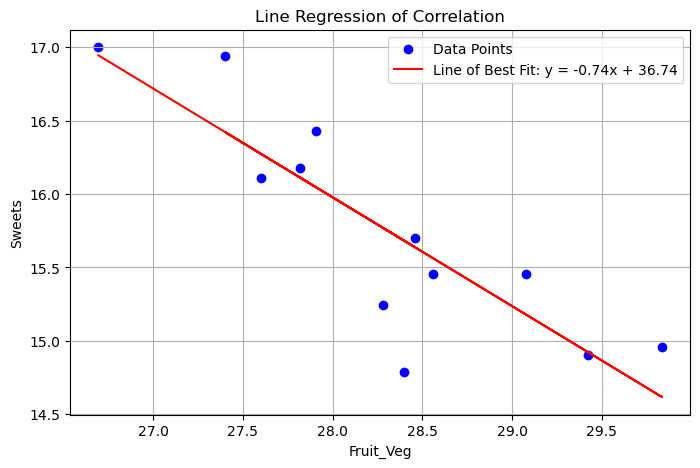

MeanSquaredError:0.14493308596522425, RootMeanSquareError:0.3807007827221061, MeanAboluteError:0.2854658591459163


In [160]:
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error, mean_absolute_error

fruit_veg_every_month = np.array(fruit_veg_every_month)
sweets_every_month = np.array(sweets_every_month)
series1 = pd.Series(fruit_veg_every_month)
series2 = pd.Series(sweets_every_month)
slope, intercept, r_value, p_value, std_err = linregress(series1, series2)

line_fit = slope * series1 + intercept

plt.figure(figsize=(8, 5))
plt.scatter(series1, series2, color='blue', label='Data Points')
plt.plot(series1, line_fit, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Line Regression of Correlation')
plt.xlabel('Fruit_Veg')
plt.ylabel('Sweets')
plt.legend()
plt.grid(True)

# plt.savefig('regression_line.png', transparent=True)
plt.show(), r_value**2

predictions = line_fit

# Calculate error metrics
mse = mean_squared_error(series2, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(series2, predictions)

mse, rmse, mae

print(f"MeanSquaredError:{mse}, RootMeanSquareError:{rmse}, MeanAboluteError:{mae}")

#### Seasonal 5 Variance scattered line graph

Seasonal Top 5 Categories indices: [ 5 13  6  0 11]

Seasonal Top 5 Categories categories: ['f_fruit_veg', 'f_sweets', 'f_grains', 'f_beer', 'f_soft_drinks']

Seasonal Bottom 5 Categories indices: [ 8  4  1  2 12]

Seasonal Bottom 5 Categories categories: ['f_poultry', 'f_fish', 'f_dairy', 'f_eggs', 'f_spirits']

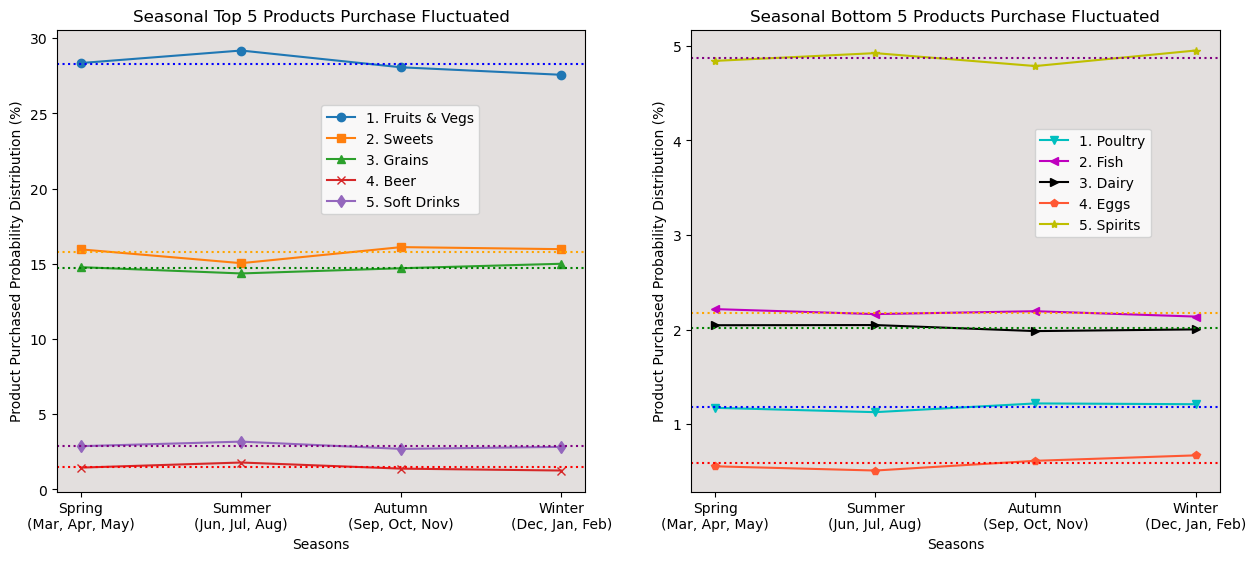

In [161]:
fruit_veg_seasons = []
sweets_seasons = []
grains_seasons = []
beer_seasons = []
soft_drinks_seasons = []

for pb_list in seasons_pb_data:
    fruit_veg_seasons.append(pb_list[5])
    sweets_seasons.append(pb_list[13])
    grains_seasons.append(pb_list[6])
    beer_seasons.append(pb_list[0])
    soft_drinks_seasons.append(pb_list[11])

fruit_veg_seasons = [i*100 for i in  fruit_veg_seasons]
sweets_seasons = [i*100 for i in sweets_seasons]
grains_seasons = [i*100 for i in grains_seasons]
beer_seasons = [i*100 for i in beer_seasons]
soft_drinks_seasons = [i*100 for i in soft_drinks_seasons]

fv_mean_s = statistics.mean(fruit_veg_seasons)
sw_mean_s = statistics.mean(sweets_seasons)
gr_mean_s = statistics.mean(grains_seasons)
be_mean_s = statistics.mean(beer_seasons)
so_mean_s = statistics.mean(soft_drinks_seasons)

#---------------------------------------------------------------------------------------

poultry_seasons = []
fish_seasons = []
dairy_seasons = []
eggs_seasons = []
spirits_seasons = []

for pb_list in seasons_pb_data:
    poultry_seasons.append(pb_list[2])
    fish_seasons.append(pb_list[4])
    dairy_seasons.append(pb_list[8])
    eggs_seasons.append(pb_list[14])
    spirits_seasons.append(pb_list[7])

poultry_seasons = [i*100 for i in  poultry_seasons]
fish_seasons = [i*100 for i in fish_seasons]
dairy_seasons = [i*100 for i in dairy_seasons]
eggs_seasons = [i*100 for i in eggs_seasons]
spirits_seasons = [i*100 for i in spirits_seasons]

po_mean_s = statistics.mean(poultry_seasons)
fi_mean_s = statistics.mean(fish_seasons)
da_mean_s = statistics.mean(dairy_seasons)
eg_mean_s = statistics.mean(eggs_seasons)
sp_mean_s = statistics.mean(spirits_seasons)

fig = plt.figure(figsize=(15, 6))

gs = gridspec.GridSpec(1,2, width_ratios=[1,1])
ax = fig.add_subplot(gs[0,0], facecolor='#e3dfde')
ax.set_facecolor('#e3dfde')

ax.plot(seasons, fruit_veg_seasons, '-o', label = "1. Fruits & Vegs")
ax.plot(seasons, sweets_seasons, '-s', label = '2. Sweets')
ax.plot(seasons, grains_seasons, '-^', label = '3. Grains')
ax.plot(seasons, beer_seasons, '-x', label = '4. Beer')
ax.plot(seasons, soft_drinks_seasons, '-d', label = '5. Soft Drinks')

ax.axhline(y=fv_mean_s, color='b', linestyle=':')
ax.axhline(y=sw_mean_s, color='orange', linestyle=':')
ax.axhline(y=gr_mean_s, color='g', linestyle=':')
ax.axhline(y=be_mean_s, color='r', linestyle=':')
ax.axhline(y=so_mean_s, color='purple', linestyle=':')

ax.set_title('Seasonal Top 5 Products Purchase Fluctuated')
ax.set_xlabel('Seasons')
ax.set_ylabel('Product Purchased Probability Distribution (%)')
ax.legend(loc = (0.5, 0.6))

plt.xticks()

ax1 = fig.add_subplot(gs[0,1], facecolor='#e3dfde')
ax1.set_facecolor('#e3dfde')
ax1.plot(seasons, poultry_seasons, '-v', color='c', label = "1. Poultry")
ax1.plot(seasons, fish_seasons, '-<', color='m', label = '2. Fish')
ax1.plot(seasons, dairy_seasons, '->', color='k', label = '3. Dairy')
ax1.plot(seasons, eggs_seasons, '-p', color='#FF5733', label = '4. Eggs')
ax1.plot(seasons, spirits_seasons, '-*', color='y', label = '5. Spirits')


ax1.axhline(y=po_mean_s, color='b', linestyle=':')
ax1.axhline(y=fi_mean_s, color='orange', linestyle=':')
ax1.axhline(y=da_mean_s, color='g', linestyle=':')
ax1.axhline(y=eg_mean_s, color='r', linestyle=':')
ax1.axhline(y=sp_mean_s, color='purple', linestyle=':')

ax1.set_title('Seasonal Bottom 5 Products Purchase Fluctuated')
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Product Purchased Probability Distribution (%)')
ax1.legend(loc = (0.65, 0.55))

plt.xticks()
plt.savefig('seaonal_linegraph.png', transparent=True)
plt.show()

In [162]:
# f_v_np = np.array(fruit_veg_every_month)
# s_np = np.array(sweets_every_month)

# corr_matrix = np.corrcoef(f_v_np, s_np)

# correlation_xy = corr_matrix[0, 1]

# print(correlation_xy)
pb_matrix = np.zeros((12, 5))
top_5_var = ['f_fruit_veg', 'f_sweets', 'f_dairy', 'f_grains', 'f_beer']
average_pbs_filtered_var = [df[top_5_var] for df in average_pbs if all(col in df.index for col in top_5_var)]
for i, a in enumerate(average_pbs_filtered_var):
    pb_matrix[i,:] = np.array(a)

# pb_matrix_min_max_normalised = (pb_matrix - pb_matrix.min(axis=0)) / (pb_matrix.max(axis=0) - pb_matrix.min(axis=0))
# print(pb_matrix_min_max_normalised)
correlations = []

for i in range(pb_matrix.shape[1]):
    for j in range(i+1, pb_matrix.shape[1]):
        corr_matrix = np.corrcoef(pb_matrix[:,i], pb_matrix[:,j], rowvar=False)
        correlation_ij = corr_matrix[0,1]
        # print(f"Correlation between {food_categories[i]} and {food_categories[j]}: {correlation_ij:.3f}")
        correlations.append((correlation_ij, i, j, corr_matrix))

correlations.sort(key=lambda x: abs(x[0]), reverse=True)

top_5_correlations = correlations[:5]

# print(top_5_correlations)


for corr, i, j, mat in top_5_correlations:
    print(f"Correlation between columns {top_5_var[i]} and {top_5_var[j]}: {corr:.3f}")

#     plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
#     sns.heatmap(mat, annot=True, fmt=".2f", cmap='coolwarm', 
#                 xticklabels=range(1, 18), yticklabels=range(1, 18))
#     plt.title('Correlation Matrix Heatmap')
#     plt.xlabel(food_categories[i])
#     plt.ylabel(food_categories[j])
#     plt.show()

Correlation between columns f_fruit_veg and f_sweets: -0.855
Correlation between columns f_grains and f_beer: -0.774
Correlation between columns f_dairy and f_grains: 0.565
Correlation between columns f_sweets and f_dairy: -0.564
Correlation between columns f_fruit_veg and f_beer: 0.465


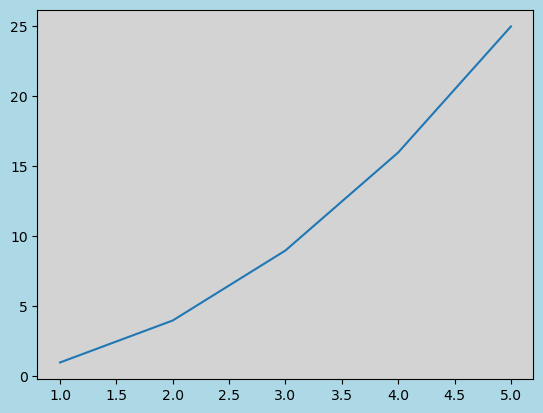

In [163]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a plot with a specified figure background color
fig, ax = plt.subplots(facecolor='lightblue')  # specify the color for the figure background
ax.plot(x, y)
ax.set_facecolor('lightgray') 
# Show the plot
plt.show()

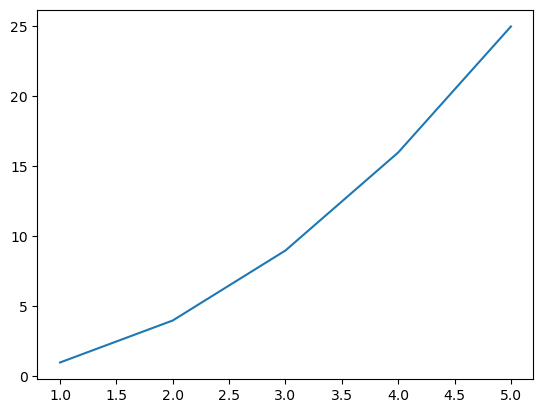

In [164]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Save the figure with a transparent background
plt.savefig('plot.png', transparent=True)

# Show the plot
plt.show()

> 2. Regional population density and age corresponding (over a year Borough, 33 regions.)
>    - Population density - average age (correlation) (scatterplot, linegraph)
>    - Average age -> most change (oldest - mid - youngest) choropleth map

>   - Product of interest
>       - Weight of meat consumption difference between average age

In [165]:
borough_year_csv = [csv for csv in area_level_csvs if  "year_borough" in csv]
ward_year_csv = [csv for csv in area_level_csvs if "year_osward" in csv]
msoa_year_csv = [csv for csv in area_level_csvs if "year_msoa" in csv]
lsoa_year_csv = [csv for csv in area_level_csvs if "year_lsoa" in csv]

borough_year_df = pd.read_csv(dataset_folder+'/'+ borough_year_csv[0])
ward_year_df = pd.read_csv(dataset_folder+'/'+ ward_year_csv[0])
msoa_year_df = pd.read_csv(dataset_folder+'/'+ msoa_year_csv[0])
lsoa_year_df = pd.read_csv(dataset_folder+'/'+ lsoa_year_csv[0])

In [166]:
import json
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Polygon, MultiPolygon
import traceback

# Try to load the GeoJSON file once again
upon_dataset_folder = 'C:/Users/jong0/Desktop/MSc Data Science/Sem 2/Applied Data Science 2/CW'
try:
    with open(upon_dataset_folder+'/london_boroughs.geojson', 'r') as file:
        london_geojson = json.load(file)
    
    # Extract the features from the GeoJSON
    features = london_geojson['features']
    
    # Create a mapping from 'area_id' to borough names
    area_name_map = {
        'E09000001': 'City of London',
        'E09000002': 'Barking and Dagenham',
        'E09000003': 'Barnet',
        'E09000004': 'Bexley',
        'E09000005': 'Brent',
        'E09000006': 'Bromley',
        'E09000007': 'Camden',
        'E09000008': 'Croydon',
        'E09000009': 'Ealing',
        'E09000010': 'Enfield',
        'E09000011': 'Greenwich',
        'E09000012': 'Hackney',
        'E09000013': 'Hammersmith and Fulham',
        'E09000014': 'Haringey',
        'E09000015': 'Harrow',
        'E09000016': 'Havering',
        'E09000017': 'Hillingdon',
        'E09000018': 'Hounslow',
        'E09000019': 'Islington',
        'E09000020': 'Kensington and Chelsea',
        'E09000021': 'Kingston upon Thames',
        'E09000022': 'Lambeth',
        'E09000023': 'Lewisham',
        'E09000024': 'Merton',
        'E09000025': 'Newham',
        'E09000026': 'Redbridge',
        'E09000027': 'Richmond upon Thames',
        'E09000028': 'Southwark',
        'E09000029': 'Sutton',
        'E09000030': 'Tower Hamlets',
        'E09000031': 'Waltham Forest',
        'E09000032': 'Wandsworth',
        'E09000033': 'Westminster'
    }
    
    # Add a name property to each feature based on the area_id
    for i, feature in enumerate(features):
        feature_properties = feature['properties']
        feature_properties["area_id"] = list(area_name_map.keys())[i]
        if 'gss_code' in feature_properties:
            area_id = feature_properties['gss_code']
            feature_properties['name'] = area_name_map.get(area_id, 'Unknown')

    # polygons = []
    # for feature in features:
    #     coordinates = feature["geometry"]["coordinates"]
    #     # lats = [coord[1] for coord in coordinates]
    #     # longs = [coord[0] for coord in coordinates]
    #     # centroid_lat = sum(lats) / len(lats)
    #     # centroid_long = sum(longs) / len(longs)
    #     # polygons.append(centroid_lat,centroid_long)
    #     polygon = Polygon(coordinates)
    #     centroid = polygon.centroid
    #     polygons.append(centroid.x, centroid.y)
    # print(polygons)
    # Now we will use Plotly to create the choropleth map
    fig = px.choropleth_mapbox(borough_year_df,
                               geojson=london_geojson,
                               locations='area_id',
                               color='avg_age',
                               color_continuous_scale='Sunset',
                               featureidkey='properties.area_id',
                               mapbox_style="carto-positron",
                               zoom=9,
                               center={"lat": 51.5074, "lon": -0.1278},
                               opacity=0.5,
                               labels={'avg_age': 'Average Age'}
                               )
    # for (index, row), centre in zip(borough_year_df.iterrows(), polygons):
    #     fig.add_trace(
    #     go.Scattermapbox(
    #         lat=[centre.y],
    #         lon=[centre.x],
    #         mode='text',
    #         text=borough_year_df['avg_age'],
    #         textposition='middle center',
    #         textfont={'size': 12, 'color': 'black'},
    #         hoverinfo='none'
    #         )
    #     )
    
    fig.update_layout(
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
    mapbox=dict(
        style='carto-positron',
        zoom=9,
        center={"lat": 51.5074, "lon": -0.1278}
    ), width=900, height=900
)

    fig.show()
except Exception as e:
    # Extracting traceback details
    tb = traceback.extract_tb(e.__traceback__)
    # Getting the last line of traceback (where the exception occurred)
    filename, line, func, text = tb[-1]
    print(f"An error occurred: {e}")
    print(f"Location: file {filename}, line {line}, in {func}")

In [167]:
area_name_map.keys()

dict_keys(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031', 'E09000032', 'E09000033'])

In [168]:
f_weight_columns = [col for col in borough_year_df.columns if col.startswith('f_') and col.endswith('_weight')]

# Compute correlations between avg_age and specific food weight columns for the borough dataset
correlations_borough_f_weights = borough_year_df[['avg_age'] + f_weight_columns].corr().loc['avg_age'].drop('avg_age')
ranked_correlations_borough_f_weights = correlations_borough_f_weights.sort_values(ascending=False)

correlations_lsoa_f_weights = lsoa_year_df[['avg_age'] + f_weight_columns].corr().loc['avg_age'].drop('avg_age')
ranked_correlations_lsoa_f_weights = correlations_lsoa_f_weights.sort_values(ascending=False)

correlations_msoa_f_weights = msoa_year_df[['avg_age'] + f_weight_columns].corr().loc['avg_age'].drop('avg_age')
ranked_correlations_msoa_f_weights = correlations_msoa_f_weights.sort_values(ascending=False)

correlations_ward_f_weights = ward_year_df[['avg_age'] + f_weight_columns].corr().loc['avg_age'].drop('avg_age')
ranked_correlations_ward_f_weights = correlations_ward_f_weights.sort_values(ascending=False)

ranked_correlations_borough_f_weights, ranked_correlations_lsoa_f_weights, ranked_correlations_msoa_f_weights, ranked_correlations_ward_f_weights

(f_readymade_weight    0.520530
 f_fruit_veg_weight    0.415582
 f_dairy_weight        0.407399
 f_sweets_weight       0.185689
 f_meat_red_weight    -0.166499
 f_fish_weight        -0.187387
 f_sauces_weight      -0.203898
 f_poultry_weight     -0.290927
 f_eggs_weight        -0.433457
 f_grains_weight      -0.463897
 f_fats_oils_weight   -0.614187
 Name: avg_age, dtype: float64,
 f_readymade_weight    0.262972
 f_fruit_veg_weight    0.206463
 f_sweets_weight       0.143682
 f_dairy_weight        0.091606
 f_sauces_weight       0.067181
 f_meat_red_weight     0.008037
 f_fish_weight        -0.014127
 f_poultry_weight     -0.070762
 f_fats_oils_weight   -0.135528
 f_eggs_weight        -0.265148
 f_grains_weight      -0.286699
 Name: avg_age, dtype: float64,
 f_readymade_weight    0.379103
 f_fruit_veg_weight    0.276308
 f_sweets_weight       0.195403
 f_sauces_weight       0.151600
 f_dairy_weight        0.145441
 f_meat_red_weight     0.025057
 f_fish_weight        -0.012853
 f_poult

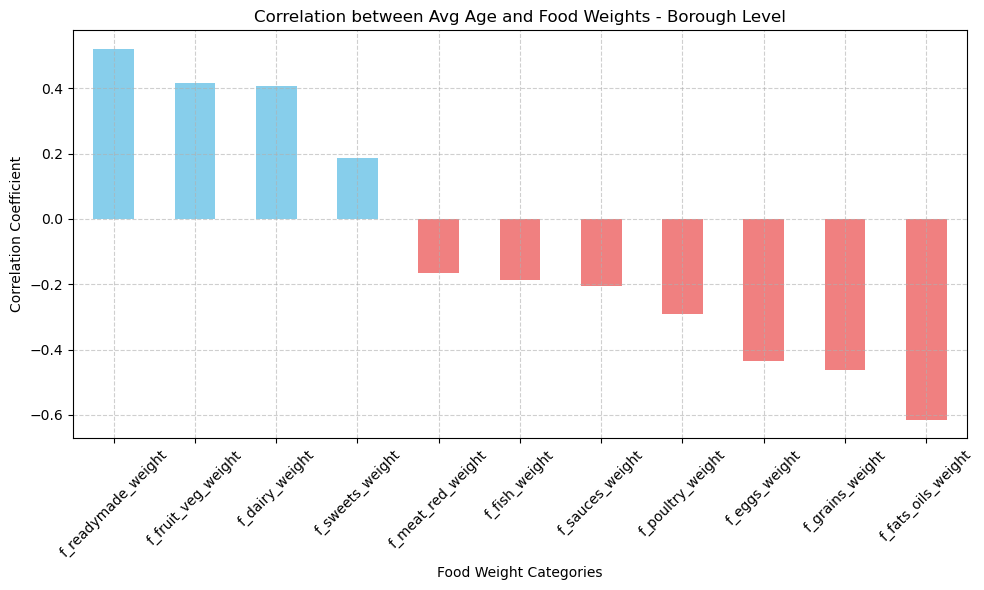

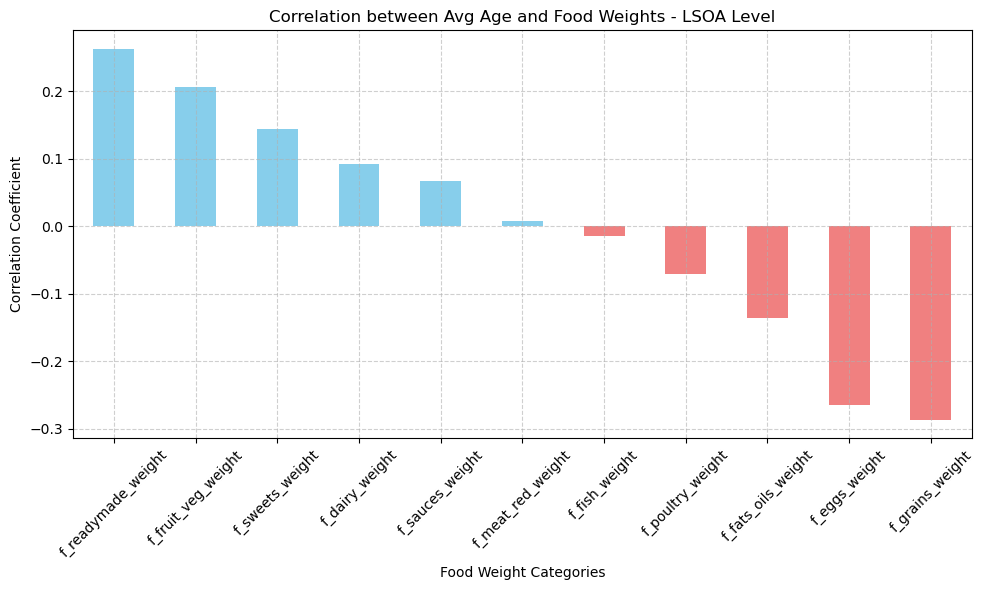

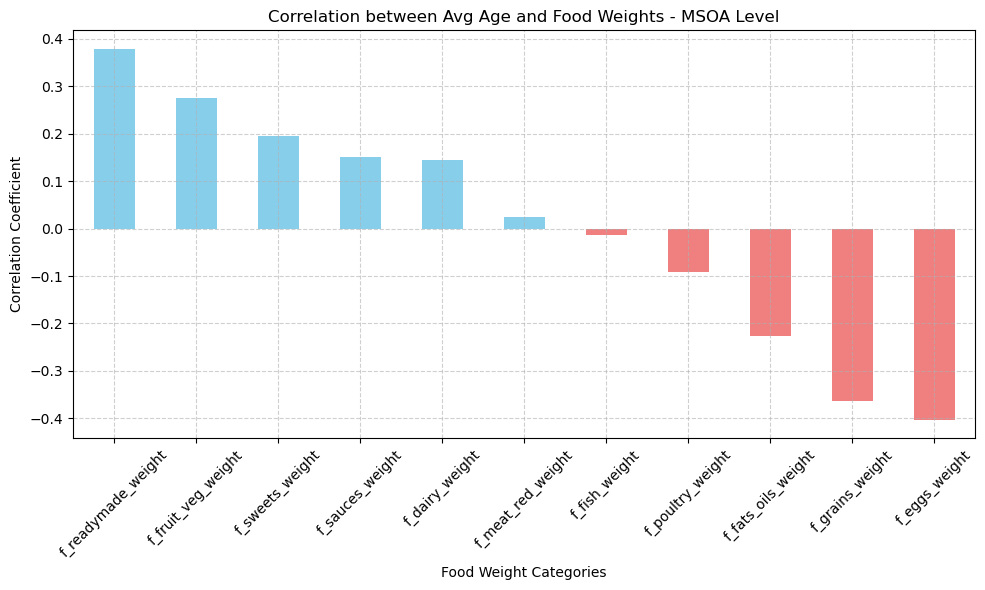

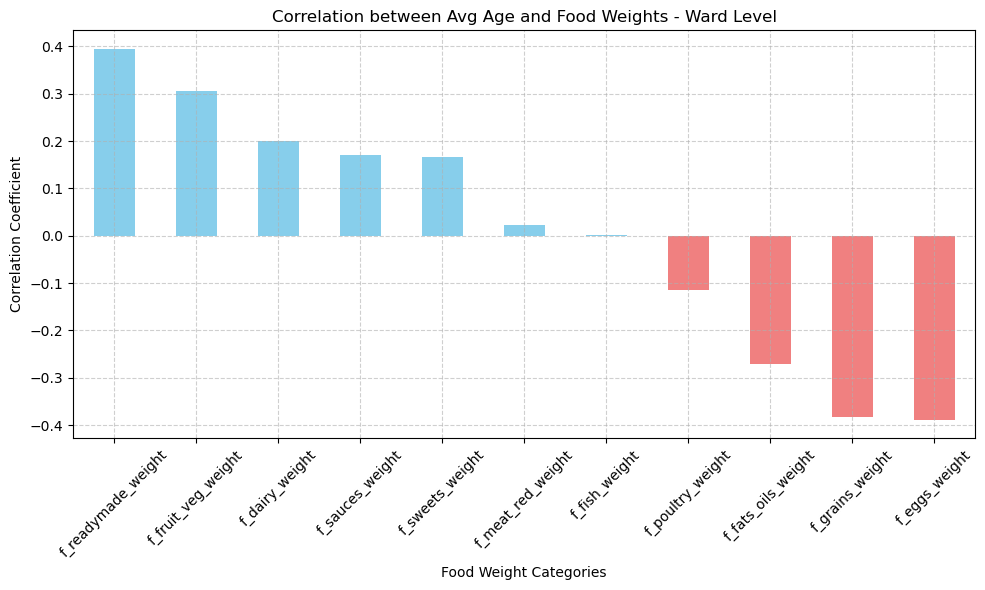

In [169]:
def plot_ranked_correlations(ranked_correlations, title):
    plt.figure(figsize=(10, 6))
    ranked_correlations.plot(kind='bar', color=[(x > 0) and 'skyblue' or '#F08080' for x in ranked_correlations])
    plt.title(f'Correlation between Avg Age and Food Weights - {title}')
    plt.xlabel('Food Weight Categories')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    # plt.savefig(f'avg_age_f_food_weight_cor_{title}.png', transparent=True)
    plt.show()

plot_ranked_correlations(ranked_correlations_borough_f_weights, 'Borough Level')
plot_ranked_correlations(ranked_correlations_lsoa_f_weights, 'LSOA Level')
plot_ranked_correlations(ranked_correlations_msoa_f_weights, 'MSOA Level')
plot_ranked_correlations(ranked_correlations_ward_f_weights, 'Ward Level')

###  Task 3: Combining Dataset 

Income dataset: https://data.london.gov.uk/dataset/earnings-workplace-borough

#### This dataset provides information about earnings of employees who are working in an area, who are on adult rates and whose pay for the survey pay-period was not affected by absence.
    
- Metadata
- Male FT (Full-Time) weekly
- Female FT weekly
- All FT weekly
- All workers
- FT workers annual Median
- FT workers annual Mean
- FT workers annual low quartile

In [170]:
upon_dataset_folder

# Load the data to see the first few rows and the structure of the file
file_path = upon_dataset_folder + '/earnings-workplace-borough.xlsx'
data_xlsx = pd.ExcelFile(file_path, engine='openpyxl')

# Display sheet names and preview the first sheet
sheet_names = data_xlsx.sheet_names
sheet_preview = pd.read_excel(data_xlsx, sheet_name=sheet_names[0])
sheet_names

['Metadata',
 'Male FT weekly',
 'Female FT weekly',
 'All FT weekly',
 'All workers',
 'FT workers annual Median',
 'FT workers annual Mean',
 'FT workers annual low quartile']

In [171]:
ft_weekly_all = pd.read_excel(data_xlsx, sheet_name='All FT weekly')

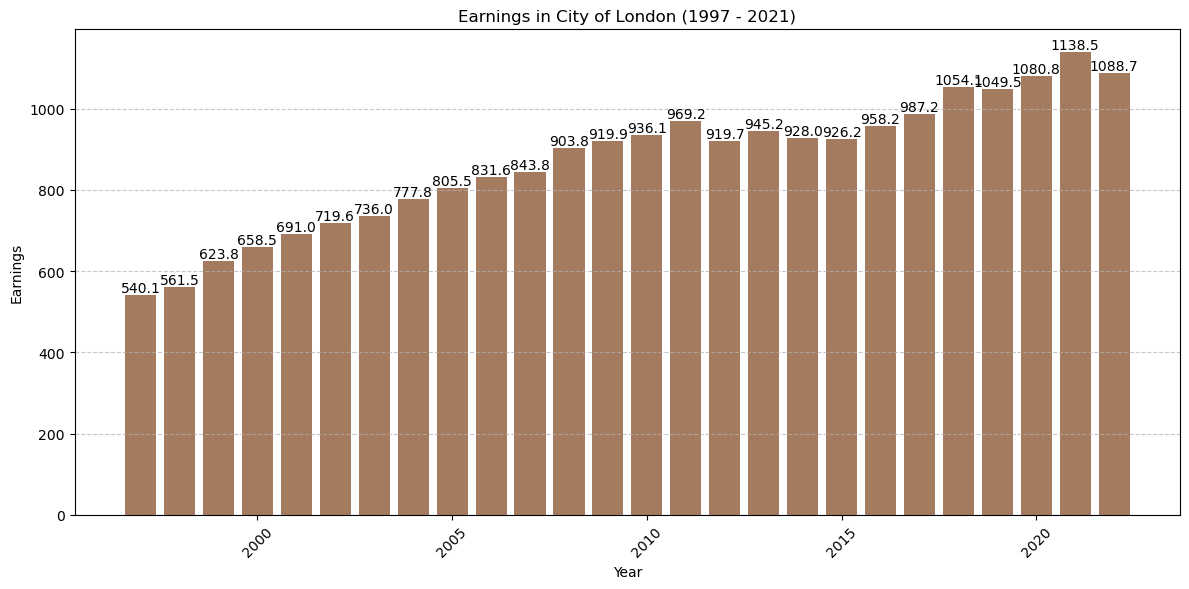

In [201]:
city_of_london_data = ft_weekly_all[ft_weekly_all['Unnamed: 1'] == 'City of London']

# Clean up column names and data to be plotted
cols = city_of_london_data.columns
years = cols[2::2]  # Select only the earning number columns
earnings = city_of_london_data.iloc[0][years].values

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(years, earnings, color='#a47b5f')
plt.title('Earnings in City of London (1997 - 2021)')
plt.xlabel('Year')
plt.ylabel('Earnings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
# plt.savefig('earnings_city_london_bar.png', transparent=True)
plt.show()

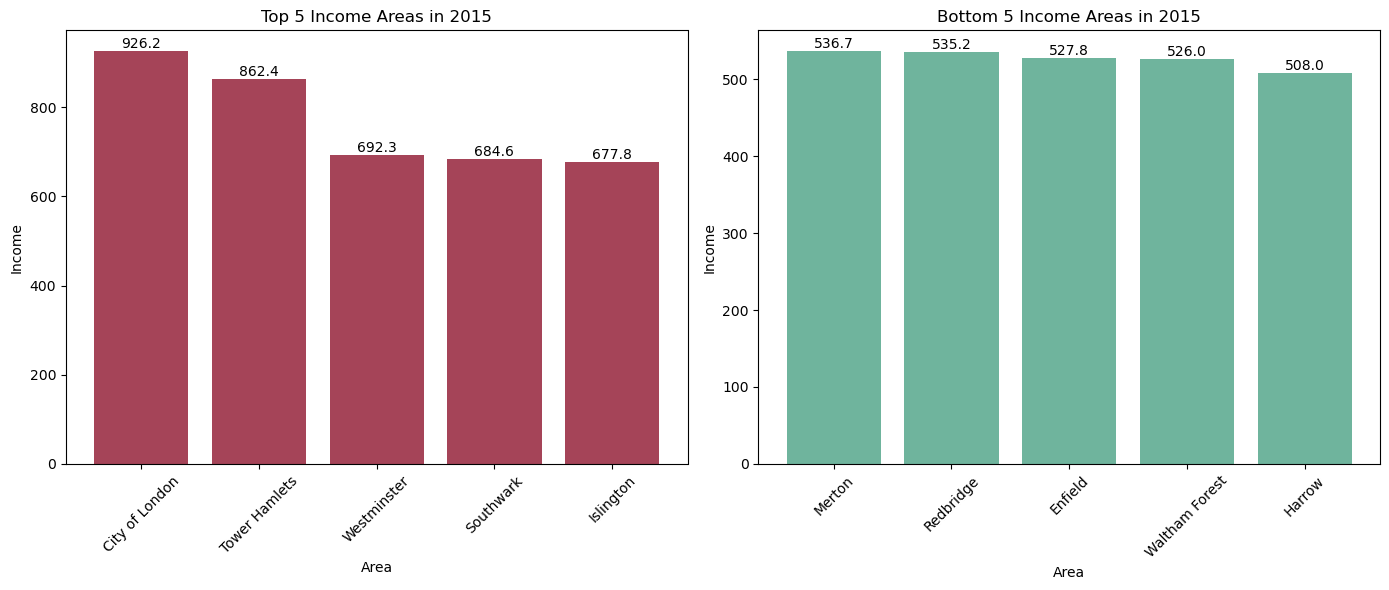

In [196]:
income_2015_corrected = ft_weekly_all[['Unnamed: 1', 2015]].iloc[:34].copy()

income_2015_corrected.columns = ['Area', 'Income']  # Rename columns for clarity

# Remove any missing values and convert income to numeric
income_2015_corrected['Income'] = pd.to_numeric(income_2015_corrected['Income'], errors='coerce')
income_2015_corrected.dropna(inplace=True)

# Sort the data by income
income_2015_sorted_corrected = income_2015_corrected.sort_values(by='Income', ascending=False)

# Extract the top 5 and bottom 5 income areas
top_5_2015_corrected = income_2015_sorted_corrected.head(5)
bottom_5_2015_corrected = income_2015_sorted_corrected.tail(5)
def add_annotations(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Top 5
axes[0].bar(top_5_2015_corrected['Area'], top_5_2015_corrected['Income'], color='#a54458')
axes[0].set_title('Top 5 Income Areas in 2015')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Income')
axes[0].tick_params(axis='x', rotation=45)
add_annotations(axes[0])

# Bottom 5
axes[1].bar(bottom_5_2015_corrected['Area'], bottom_5_2015_corrected['Income'], color='#6fb49d')
axes[1].set_title('Bottom 5 Income Areas in 2015')
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Income')
axes[1].tick_params(axis='x', rotation=45)
add_annotations(axes[1])

plt.tight_layout()
# plt.savefig('top_bottom_5_income.png', transparent=True)
plt.show()

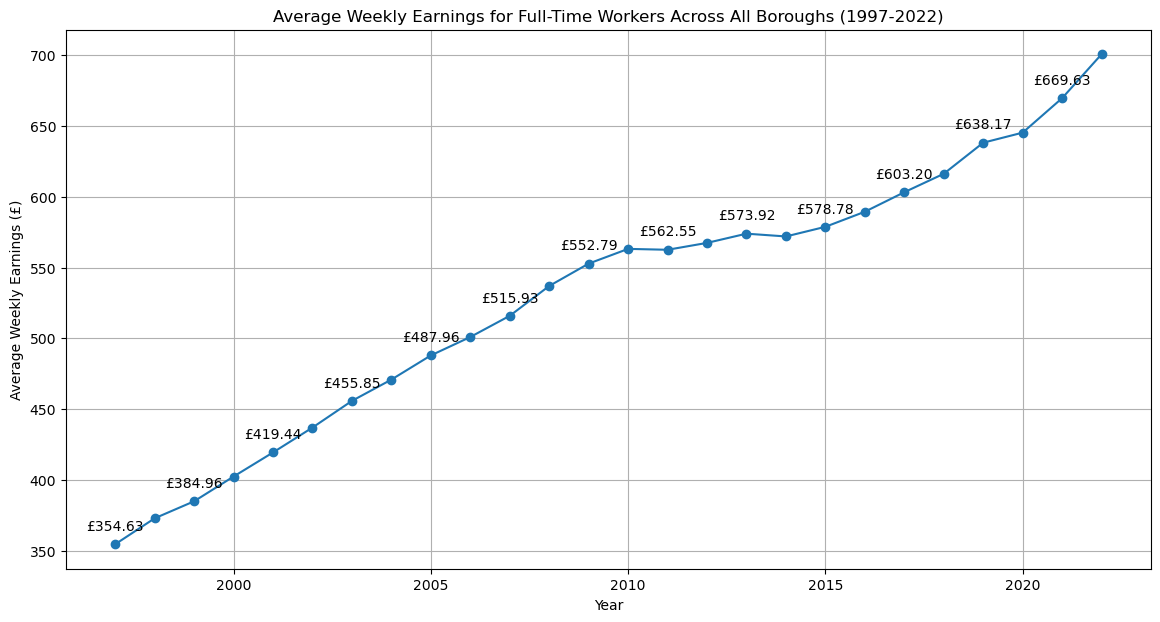

In [206]:
# Clean the data to focus on yearly average earnings
# Remove the confidence interval columns and aggregate the data
ft_weekly_all_cleaned = ft_weekly_all.iloc[1:, 2::2]  # Skip metadata row and select only earnings columns
ft_weekly_all_cleaned.columns = range(1997, 2023)  # Rename columns to years for simplicity

# Convert data to numeric and calculate the mean for each year across all boroughs
ft_weekly_all_cleaned = ft_weekly_all_cleaned.apply(pd.to_numeric, errors='coerce')
mean_earnings_by_year = ft_weekly_all_cleaned.mean()

# Plotting the average earnings trend over the years
plt.figure(figsize=(14, 7))
plt.plot(mean_earnings_by_year.index, mean_earnings_by_year.values, marker='o')
plt.title('Average Weekly Earnings for Full-Time Workers Across All Boroughs (1997-2022)')
plt.xlabel('Year')
plt.ylabel('Average Weekly Earnings (£)')
plt.grid(True)

for x, y in zip(mean_earnings_by_year.index[0::2], mean_earnings_by_year.values[0::2]):
    label = f"£{y:.2f}"
    plt.annotate(label,  # this is the text
                 (x, y),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0, 10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center
plt.savefig('Avg_weekly_earnings_linegraph.png', transparent=True)
plt.show()

In [173]:
# Extract the borough names to use as an index
borough_names = ft_weekly_all.iloc[1:, 1]  # Skip metadata row
ft_weekly_all_cleaned.index = borough_names

# Calculate the latest year (2022) earnings and compare across boroughs
year_2015_earnings = ft_weekly_all_cleaned[2015].dropna()  # Drop any missing values

# Sort to find the boroughs with the highest and lowest earnings
highest_earnings_boroughs = year_2015_earnings.sort_values(ascending=False).head(5)
lowest_earnings_boroughs = year_2015_earnings.sort_values(ascending=True).head(5)

highest_earnings_boroughs, lowest_earnings_boroughs

(Unnamed: 1
 City of London    926.2
 Tower Hamlets     862.4
 Westminster       692.3
 Southwark         684.6
 Islington         677.8
 Name: 2015, dtype: float64,
 Unnamed: 1
 Wales                       478.6
 East Midlands               479.1
 Northern Ireland            484.7
 Yorkshire and The Humber    486.2
 North West                  488.7
 Name: 2015, dtype: float64)

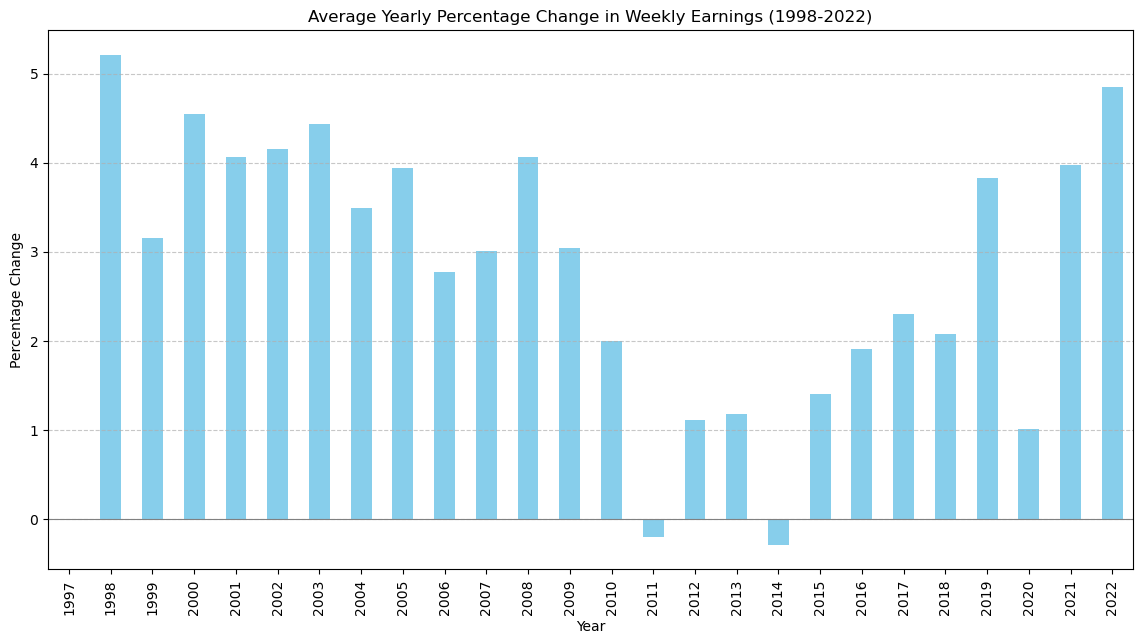

In [174]:
yearly_changes = ft_weekly_all_cleaned.pct_change(axis='columns') * 100  # Calculate percentage change year-over-year
average_yearly_changes = yearly_changes.mean()  # Average change per year across all boroughs

plt.figure(figsize=(14, 7))
average_yearly_changes.plot(kind='bar', color='skyblue')
plt.title('Average Yearly Percentage Change in Weekly Earnings (1998-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.axhline(0, color='gray', linewidth=0.8)  # Add a line at zero for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> Demographics info with the earning
    - Age
    - Gender population

In [177]:
ft_weekly_all.head(5)

Unnamed: 0            Unnamed: 1    1997 Unnamed: 3    1998 Unnamed: 5  \
0       Code                  Area  number     conf %  number     conf %   
1  E09000001        City of London   540.1        2.5   561.5          2   
2  E09000002  Barking and Dagenham     330          6   431.3        6.3   
3  E09000003                Barnet     334        5.4   356.6          4   
4  E09000004                Bexley   345.8        6.4   359.1        4.7   

     1999 Unnamed: 7    2000 Unnamed: 9  ...    2018 Unnamed: 45    2019  \
0  number     conf %  number     conf %  ...  number      conf %  number   
1   623.8          3   658.5        2.9  ...  1054.1         2.9  1049.5   
2   398.1        6.2     424        7.6  ...   579.1         5.4   569.5   
3   366.9        5.6   381.7        7.3  ...     579         5.4     596   
4   362.4          5   373.3        5.1  ...   591.4         5.3     613   

  Unnamed: 47    2020 Unnamed: 49    2021 Unnamed: 51    2022 Unnamed: 53  
0      conf %  number      conf %  number      conf %  number      conf %  
1         3.1  1080.8         3.4  1138.5         3.4  1088.7         2.4  
2         7.2   621.8           8   622.4           7   615.9         7.3  
3           7     613           8   613.3           6   626.4         6.8  
4         4.4   571.6           8   606.6         8.2   660.6         6.1  

[5 rows x 54 columns]

In [176]:
borough_year_df.head(5)

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0  E09000001  323.174750            35.0          150.0          250.0   
1  E09000002  421.304125            32.5          165.6          300.0   
2  E09000003  407.170491            40.0          180.0          320.0   
3  E09000004  359.544126            30.0          144.0          255.0   
4  E09000005  434.324141            40.0          175.0          325.0   

   weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0          400.0           1000.0  323.692596     1.001520   98.842963  ...   
1          500.0           1500.0  597.994271     0.828993  122.341294  ...   
2          500.0           1160.0  443.644324     0.171615  114.933771  ...   
3          450.0           1000.0  476.576945     0.819748  106.446426  ...   
4          500.0           1500.0  616.087316     0.354492  128.930369  ...   

   man_day  population      male    female  age_0_17  age_18_64  age_65+  \
0   103883      6687.0    3697.0    2990.0    1018.0     4349.0   1320.0   
1   397127    203101.0   99442.0  103659.0   60281.0   123180.0  19640.0   
2  4131210    378778.0  186357.0  192421.0   88754.0   237036.0  52988.0   
3   380177    242387.0  116814.0  125573.0   56028.0   146237.0  40122.0   
4  2541113    323443.0  163939.0  159504.0   75033.0   211885.0  36525.0   

     avg_age  area_sq_km  people_per_sq_km  
0  43.910124        2.90       2305.862069  
1  33.017321       36.09       5627.625381  
2  37.195582       86.76       4365.813739  
3  38.880749       60.58       4001.105976  
4  35.766416       43.28       7473.267098  

[5 rows x 202 columns]

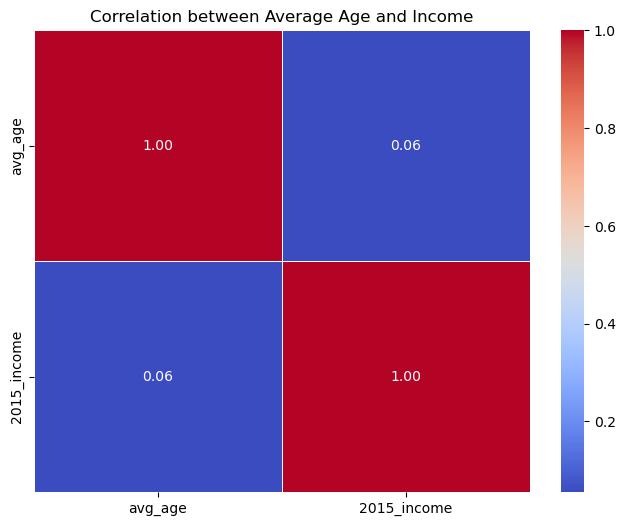

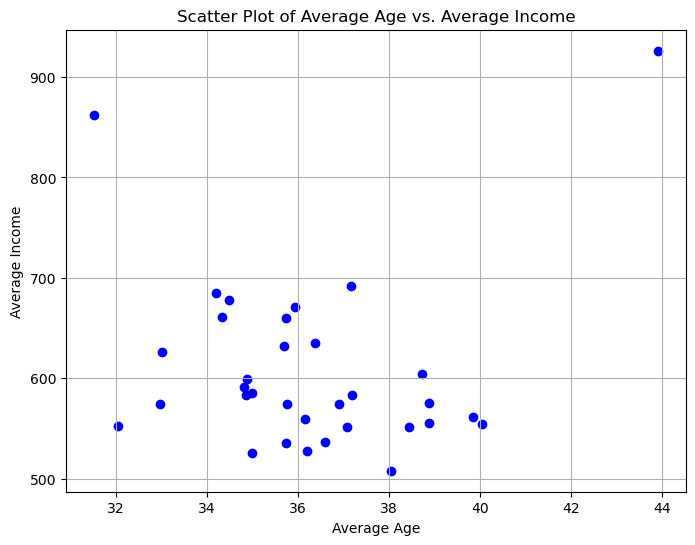

In [97]:
borough_year_df_cleaned = borough_year_df[['area_id', 'avg_age']]
ft_weekly_all_cleaned = ft_weekly_all.iloc[1:34, 0::2]
ft_weekly_all_cleaned.rename(columns={'Unnamed: 0':'area_id'}, inplace=True)
ft_weekly_all_cleaned = ft_weekly_all_cleaned[['area_id', 2015]]
ft_weekly_all_cleaned.rename(columns={2015 :'2015_income'}, inplace=True)
merged_df = pd.merge(borough_year_df_cleaned, ft_weekly_all_cleaned, on='area_id', how='left')

correlation_matrix = merged_df[['avg_age', '2015_income']].corr()
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Average Age and Income')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['avg_age'], merged_df['2015_income'], color='blue', marker='o')
plt.title('Scatter Plot of Average Age vs. Average Income')
plt.xlabel('Average Age')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

#### Income and alcohol consumption

> Correlation between the average weekly income and alcohol consumption
- 

In [109]:
ss = area_level_csvs_combined[[col for col in area_level_csvs_combined.columns if len(col) < 9 and 'f_' not in col]]
ss.head(5)

area_id      weight      volume       fat    fat_std  fat_ci95  saturate  \
0  E09000001  324.440915   96.984921  8.458041  13.803825  0.119948  3.357529   
1  E09000002  421.170169  119.051740  9.268406  14.900605  0.057824  3.607954   
2  E09000003  413.666716  111.907652  8.482420  14.616478  0.015769  3.361327   
3  E09000004  358.156972  104.120212  9.102892  14.136920  0.067131  3.476263   
4  E09000005  435.715837  125.448799  9.250013  15.513608  0.024810  3.695182   

       salt  salt_std      sugar  ...   carb_std     fibre   alcohol  \
0  0.532971  1.447854   9.187517  ...  21.506992  1.609087  0.379157   
1  0.598626  1.714895  10.683555  ...  25.050403  1.580891  0.181693   
2  0.551119  2.042487   9.287471  ...  22.597053  1.625202  0.239351   
3  0.576183  1.501935  10.998802  ...  23.930128  1.645999  0.206232   
4  0.566762  1.723531  10.120945  ...  23.564622  1.569537  0.199098   

    h_items  man_day      male    female  age_0_17  age_65+    avg_age  
0  3.181010     8523    3697.0    2990.0    1018.0   1320.0  43.910124  
1  3.257637    33116   99442.0  103659.0   60281.0  19640.0  33.017321  
2  3.168729   346737  186357.0  192421.0   88754.0  52988.0  37.195582  
3  3.245876    32785  116814.0  125573.0   56028.0  40122.0  38.880749  
4  3.248138   211828  163939.0  159504.0   75033.0  36525.0  35.766416  

[5 rows x 22 columns]

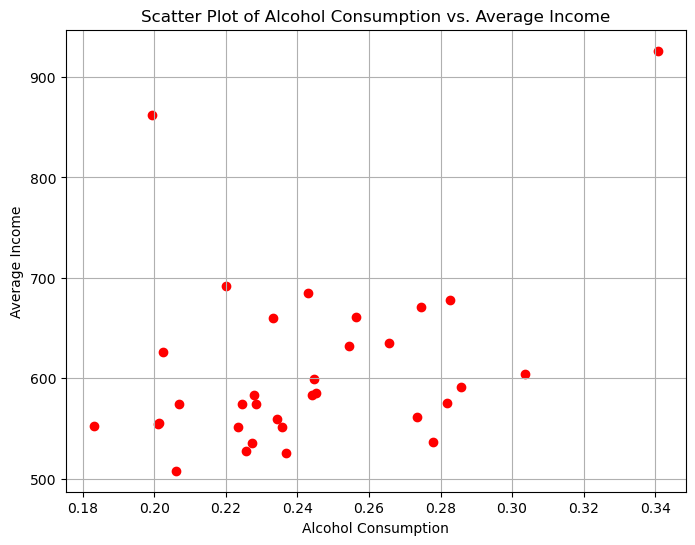

In [115]:
borough_alcohol = borough_year_df[['area_id'] + [col for col in area_level_csvs_combined.columns if 'alcohol' in col and 'energy' not in col]]

alcohol_df = pd.merge(borough_alcohol, ft_weekly_all_cleaned, on='area_id', how='left')
alcohol_df.head(5)
correlation_matrix = alcohol_df[['alcohol', '2015_income']].corr()

plt.figure(figsize=(8, 6))
plt.scatter(alcohol_df['alcohol'], alcohol_df['2015_income'], color='red', marker='o')
plt.title('Scatter Plot of Alcohol Consumption vs. Average Income')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

C:\Users\jong0\AppData\Local\Temp\ipykernel_38976\705137422.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jong0\AppData\Local\Temp\ipykernel_38976\705137422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



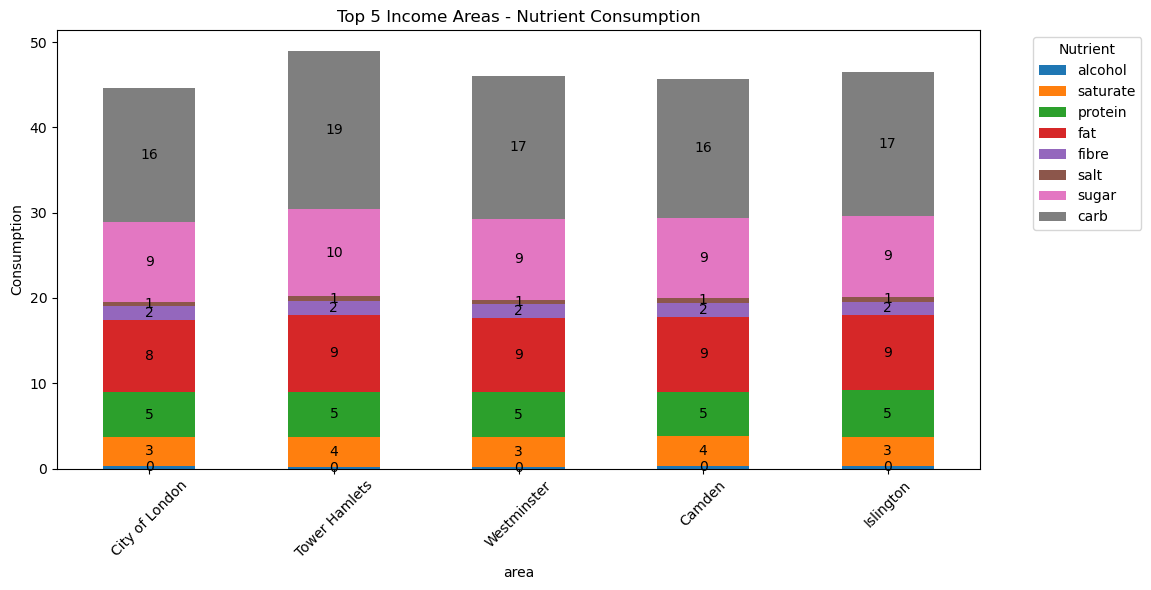

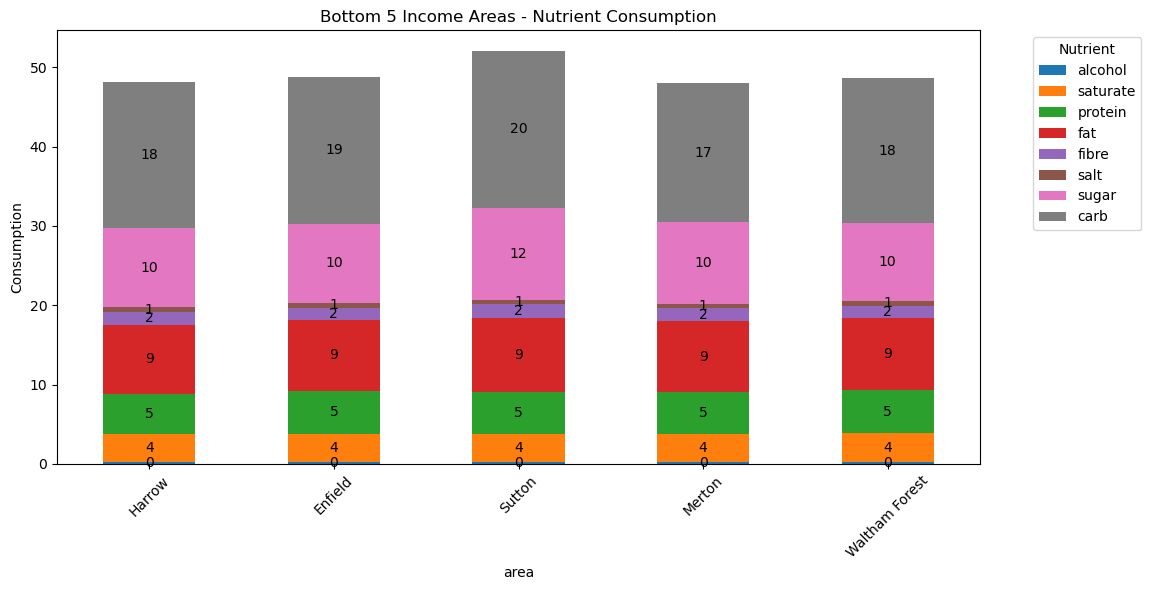

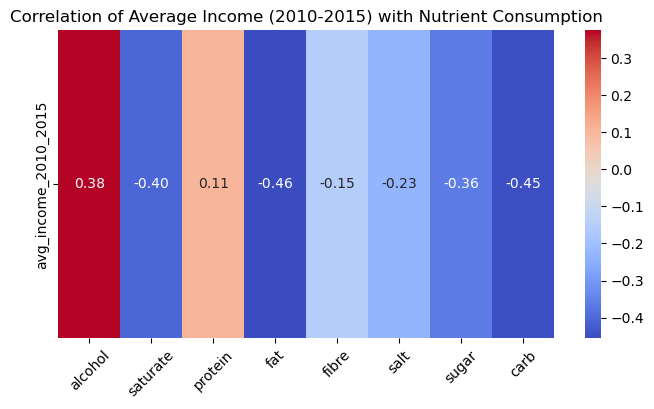

In [214]:
earnings_path = upon_dataset_folder+'/earnings-workplace-borough.xlsx'
grocery_path = dataset_folder+'/year_borough_grocery.csv'
earnings_df = pd.read_excel(earnings_path, sheet_name="All FT weekly")
grocery_df = pd.read_csv(grocery_path)

# Clean and prepare income data
income_df = earnings_df[1:]  # Skip the first row that's header-like
income_df.columns = [str(col).strip() for col in income_df.columns]
years = [str(year) for year in range(2010, 2016)]
income_df_selected = income_df[['Unnamed: 0', 'Unnamed: 1'] + years]
income_df_selected.columns = ['area_id', 'area'] + years
for year in years:
    income_df_selected[year] = pd.to_numeric(income_df_selected[year], errors='coerce')
income_df_selected['avg_income_2010_2015'] = income_df_selected[years].mean(axis=1)
income_avg_df = income_df_selected[['area_id', 'area', 'avg_income_2010_2015']]

# Prepare grocery data
nutrient_columns = ['alcohol', 'saturate', 'protein', 'fat', 'fibre', 'salt', 'sugar', 'carb']
grocery_nutrients_df = grocery_df[['area_id'] + nutrient_columns]

# Merge datasets
merged_avg_income_df = pd.merge(income_avg_df, grocery_nutrients_df, on='area_id', how='inner')

# Find top 5 and bottom 5 income areas and create stacked bar plots
top_5_areas = merged_avg_income_df.nlargest(5, 'avg_income_2010_2015')
bottom_5_areas = merged_avg_income_df.nsmallest(5, 'avg_income_2010_2015')

def create_stacked_plot(df, title):
    ax = df.set_index('area')[nutrient_columns].plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel('Consumption')
    plt.xticks(rotation=45)
    plt.legend(title='Nutrient')
    plt.tight_layout()
    

    for c in ax.containers:
        # Optional: add labels to the top of the stacks
        labels = [f'{w:.0f}' for w in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='center')
    plt.legend(title='Nutrient', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'nutrients_income_bar_{title}.png', transparent=True)
    plt.show()

create_stacked_plot(top_5_areas, 'Top 5 Income Areas - Nutrient Consumption')
create_stacked_plot(bottom_5_areas, 'Bottom 5 Income Areas - Nutrient Consumption')

# Calculate and display correlation heatmap
correlations = merged_avg_income_df[['avg_income_2010_2015'] + nutrient_columns].corr().iloc[0, 1:]
plt.figure(figsize=(8, 4))
sns.heatmap(correlations.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Average Income (2010-2015) with Nutrient Consumption')
plt.xticks(rotation=45)
# plt.savefig('income_nutrients_correlation_heapmap.png', transparent=True)

plt.show()

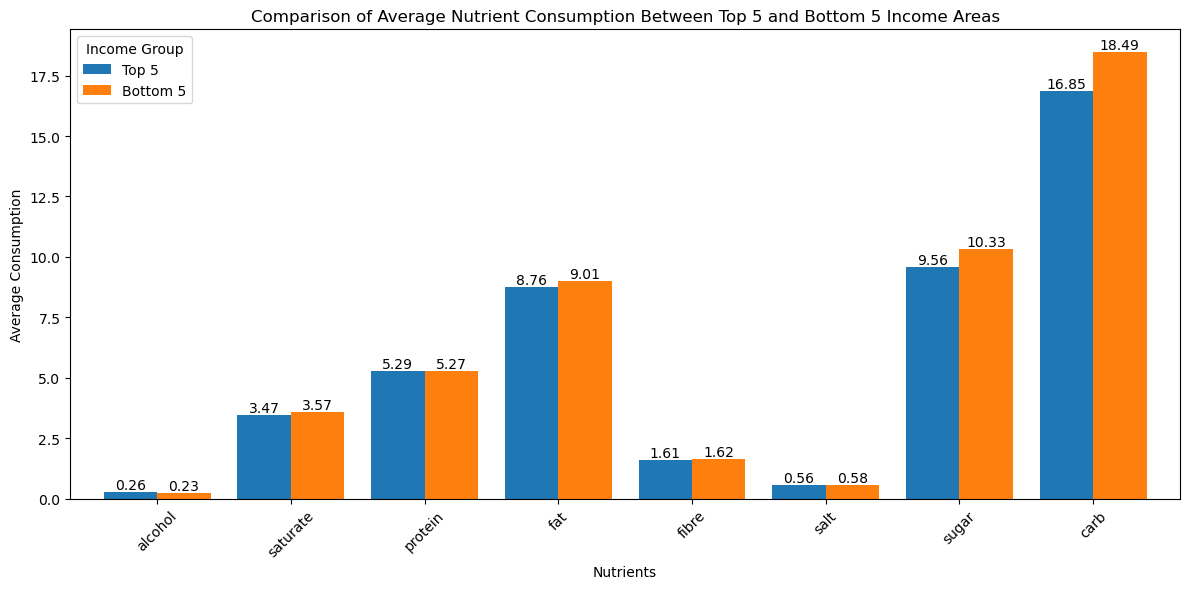

In [118]:
top_5_avg = top_5_areas[nutrient_columns].mean()
bottom_5_avg = bottom_5_areas[nutrient_columns].mean()

# Create a DataFrame from the averages
avg_df = pd.DataFrame([top_5_avg, bottom_5_avg], index=['Top 5', 'Bottom 5'])

transposed_avg_df = avg_df.T

# Plot side-by-side comparison for each nutrient
ax = transposed_avg_df.plot(kind='bar', figsize=(12, 6), width=0.8)
ax.set_title('Comparison of Average Nutrient Consumption Between Top 5 and Bottom 5 Income Areas')
ax.set_ylabel('Average Consumption')
ax.set_xlabel('Nutrients')
plt.xticks(rotation=45)
plt.legend(title='Income Group')

# Annotate values on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, 
            y + height, 
            f'{height:.2f}', 
            horizontalalignment='center', 
            verticalalignment='bottom')

plt.tight_layout()
plt.show()

- **Alcohol**: Positive correlation (`r=0.375`), suggesting that higher income areas tend to have higher alcohol consumption.
- **Saturate**: Negative correlation (`r=-0.405`), indicating that higher income areas tend to consume less saturated fats.
- **Protein**: Slightly positive correlation (`r=0.106`), but the correlation is relatively weak, suggesting a minimal relationship between income and protein consumption.
- **Fat**: Negative correlation (`r=-0.455`), suggesting that higher income areas consume less fat.
- **Fibre**: Negative correlation (`r=-0.153`), implying that higher income areas consume slightly less fibre.
- **Salt**: Negative correlation (`r=-0.233`), indicating that higher income areas consume less salt.
- **Sugar**: Negative correlation (`r=-0.363`), suggesting that higher income areas consume less sugar.
- **Carb**: Negative correlation (`r=-0.446`), indicating that higher income areas consume fewer carbohydrates.
